In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import copy

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
### Finding a correlation between the data

<AxesSubplot:>

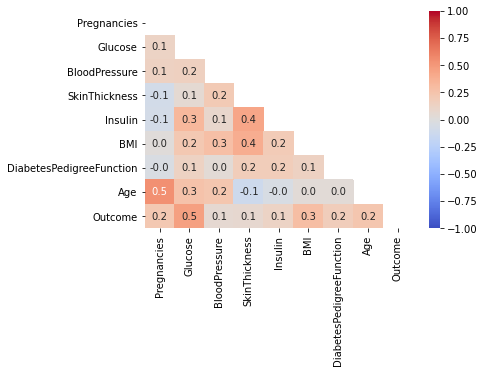

In [8]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [9]:
### Description w.r.t. to class
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [11]:
def describe_class_wise(feature):
    print('Feature wise Description\n')
    print(df.groupby('Outcome')[feature].describe())

In [12]:
for feature in features:
    describe_class_wise(feature)

Feature wise Description

         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0        500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1        268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0
Feature wise Description

         count        mean        std  min    25%    50%    75%    max
Outcome                                                               
0        500.0  109.980000  26.141200  0.0   93.0  107.0  125.0  197.0
1        268.0  141.257463  31.939622  0.0  119.0  140.0  167.0  199.0
Feature wise Description

         count       mean        std  min   25%   50%   75%    max
Outcome                                                           
0        500.0  68.184000  18.063075  0.0  62.0  70.0  78.0  122.0
1        268.0  70.824627  21.491812  0.0  66.0  74.0  82.0  114.0
Feature wise Description

         count       mean        std  min  25%   50%   75%   max
Outcome                        

In [13]:
### Plotting Histogram for Outcome feature

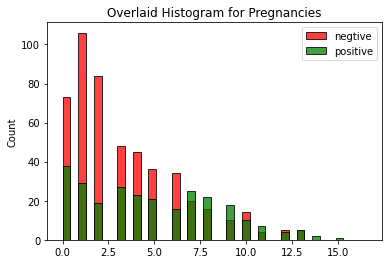

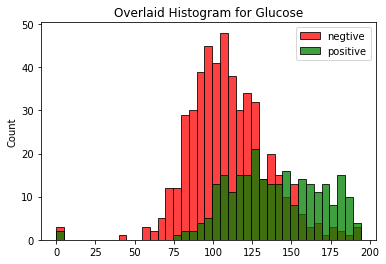

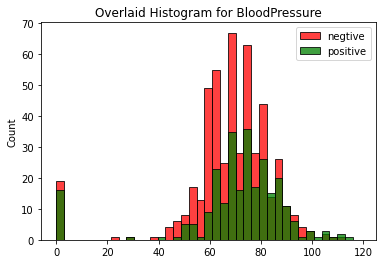

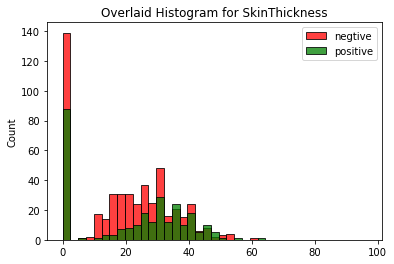

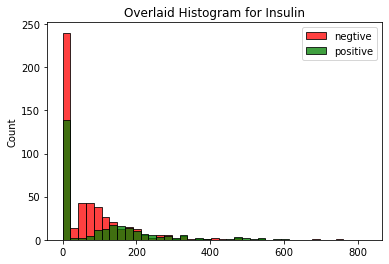

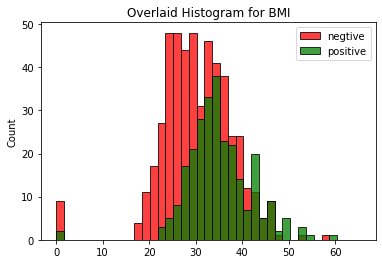

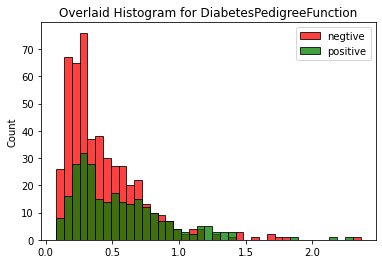

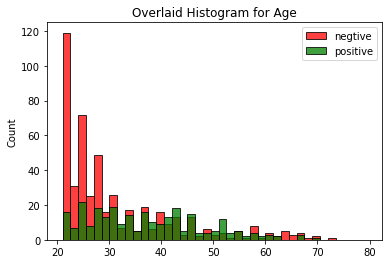

In [15]:
for i in features:
    positive = list(df[df['Outcome'] == 1][i])
    negative = list(df[df['Outcome'] == 0][i])
    xmin = min(min(negative), min(positive))
    xmax = max(max(negative), max(positive))
    width = (xmax - xmin) / 40
    sns.histplot(negative, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.histplot(positive, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['negtive', 'positive'])
    plt.title('Overlaid Histogram for {}'.format(i))
    plt.show()

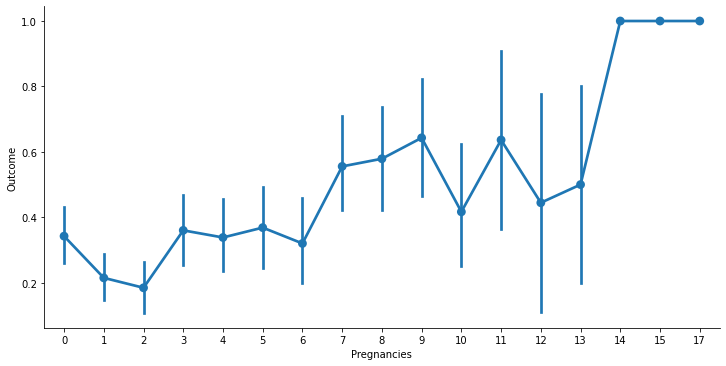

In [18]:
## Categorical plots for ordinal features
sns.catplot('Pregnancies', 'Outcome', data=df, kind='point', aspect=2)
plt.show()

In [22]:
def detect_outliers(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y-mean)/std
        if np.abs(z_score) > 3:
            outliers.append(y)
    
    print('\nOutlier caps for {}'.format(feature))
    print('--95p: {:.1f} / {} values exceed that '.format(data.quantile(.95), len([i for i in data if i > data.quantile(.95)])))
    print('--3sd {:.1f} / {} values exceed that '.format(mean + 3*(std), len(outliers)))
    print('--99p {:.1f} / {} values exceed that '.format(data.quantile(.99), len([i for i in data if i > data.quantile(.99)])))

In [23]:
for feature in features:
    detect_outliers(feature)


Outlier caps for Pregnancies
--95p: 10.0 / 34 values exceed that 
--3sd 13.9 / 4 values exceed that 
--99p 13.0 / 4 values exceed that 

Outlier caps for Glucose
--95p: 181.0 / 36 values exceed that 
--3sd 216.7 / 5 values exceed that 
--99p 196.0 / 6 values exceed that 

Outlier caps for BloodPressure
--95p: 90.0 / 38 values exceed that 
--3sd 127.1 / 35 values exceed that 
--99p 106.0 / 7 values exceed that 

Outlier caps for SkinThickness
--95p: 44.0 / 37 values exceed that 
--3sd 68.4 / 1 values exceed that 
--99p 51.3 / 8 values exceed that 

Outlier caps for Insulin
--95p: 293.0 / 38 values exceed that 
--3sd 425.3 / 18 values exceed that 
--99p 519.9 / 8 values exceed that 

Outlier caps for BMI
--95p: 44.4 / 39 values exceed that 
--3sd 55.6 / 14 values exceed that 
--99p 50.8 / 8 values exceed that 

Outlier caps for DiabetesPedigreeFunction
--95p: 1.1 / 39 values exceed that 
--3sd 1.5 / 11 values exceed that 
--99p 1.7 / 8 values exceed that 

Outlier caps for Age
--95p: 58

In [24]:
def remove_outliers(feature):
    df[feature+'_clean'] = df[feature].clip(upper=df[feature].quantile(.99))

for feature in features:
    remove_outliers(feature)

In [25]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_clean,Glucose_clean,BloodPressure_clean,SkinThickness_clean,Insulin_clean,BMI_clean,DiabetesPedigreeFunction_clean,Age_clean
0,6,148,72,35,0,33.6,0.627,50,1,6,148,72,35.0,0.0,33.6,0.62700,50
1,1,85,66,29,0,26.6,0.351,31,0,1,85,66,29.0,0.0,26.6,0.35100,31
2,8,183,64,0,0,23.3,0.672,32,1,8,183,64,0.0,0.0,23.3,0.67200,32
3,1,89,66,23,94,28.1,0.167,21,0,1,89,66,23.0,94.0,28.1,0.16700,21
4,0,137,40,35,168,43.1,2.288,33,1,0,137,40,35.0,168.0,43.1,1.69833,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,10,101,76,48.0,180.0,32.9,0.17100,63
764,2,122,70,27,0,36.8,0.340,27,0,2,122,70,27.0,0.0,36.8,0.34000,27
765,5,121,72,23,112,26.2,0.245,30,0,5,121,72,23.0,112.0,26.2,0.24500,30
766,1,126,60,0,0,30.1,0.349,47,1,1,126,60,0.0,0.0,30.1,0.34900,47


In [26]:
df.isna().sum()

Pregnancies                       0
Glucose                           0
BloodPressure                     0
SkinThickness                     0
Insulin                           0
BMI                               0
DiabetesPedigreeFunction          0
Age                               0
Outcome                           0
Pregnancies_clean                 0
Glucose_clean                     0
BloodPressure_clean               0
SkinThickness_clean               0
Insulin_clean                     0
BMI_clean                         0
DiabetesPedigreeFunction_clean    0
Age_clean                         0
dtype: int64

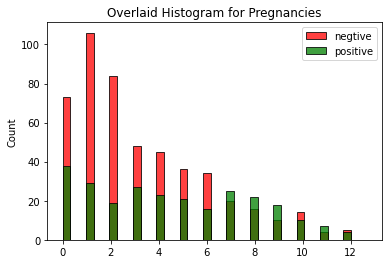

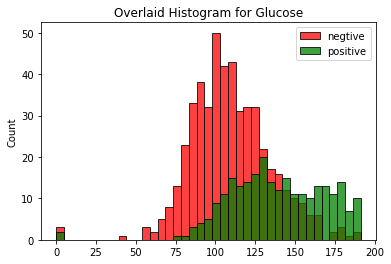

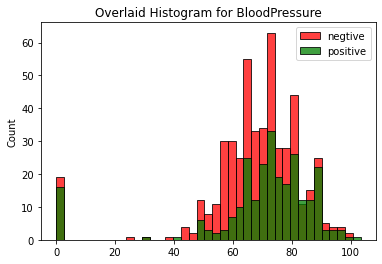

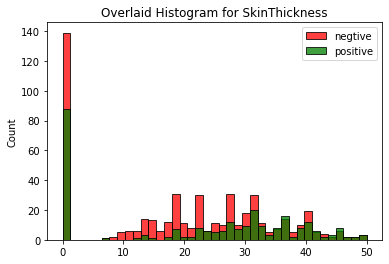

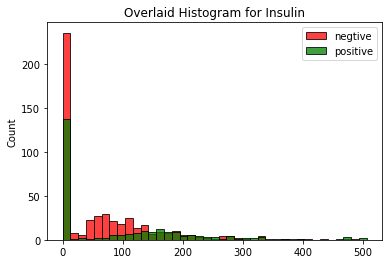

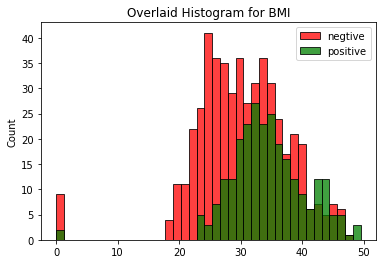

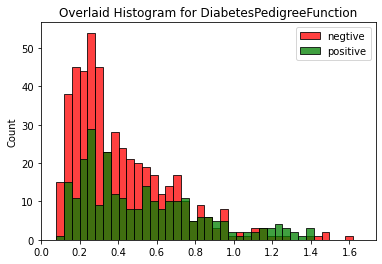

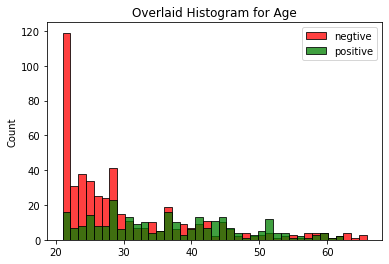

In [27]:
for i in features:
    positive = list(df[df['Outcome'] == 1][i+'_clean'])
    negative = list(df[df['Outcome'] == 0][i+'_clean'])
    xmin = min(min(negative), min(positive))
    xmax = max(max(negative), max(positive))
    width = (xmax - xmin) / 40
    sns.histplot(negative, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.histplot(positive, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['negtive', 'positive'])
    plt.title('Overlaid Histogram for {}'.format(i))
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


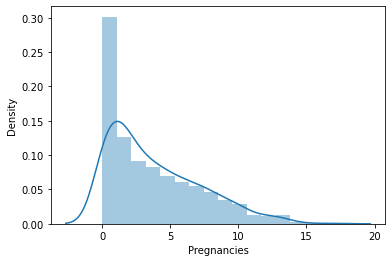

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


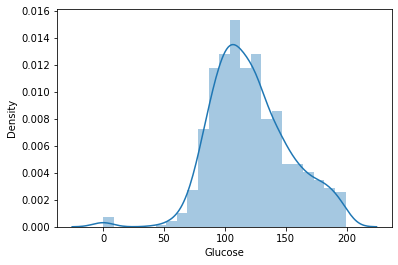

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


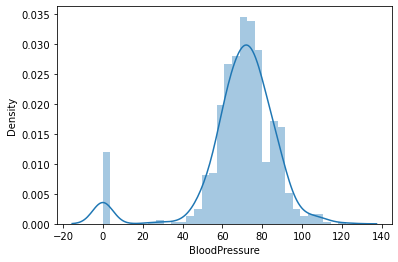

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


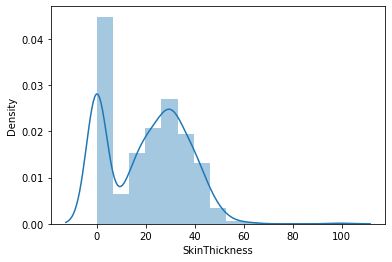

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


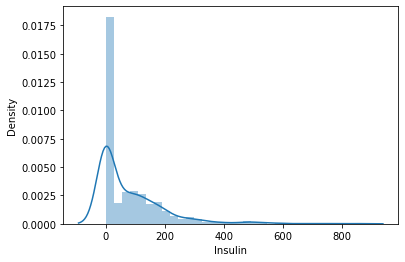

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


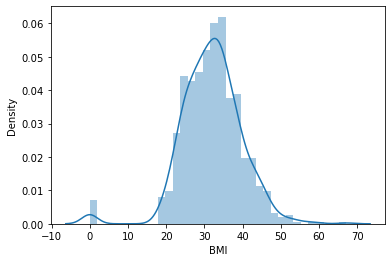

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


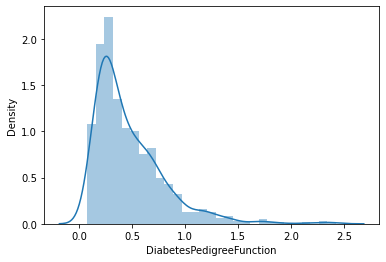

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


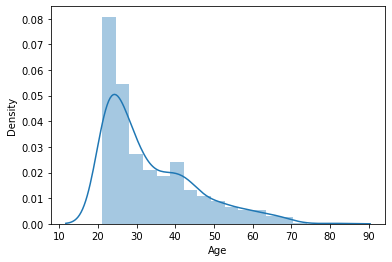

In [32]:
for i in features:
    sns.distplot(df[i], kde=True)
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


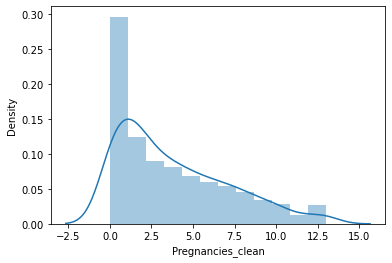

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


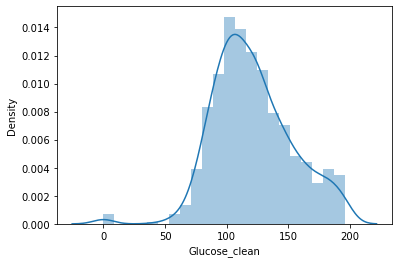

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


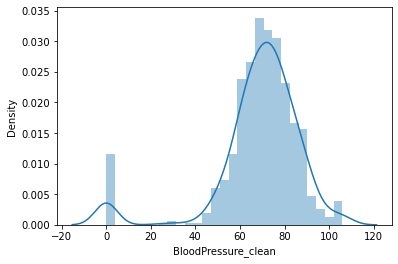

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


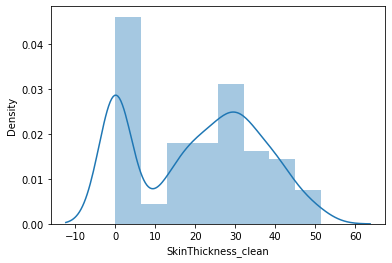

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


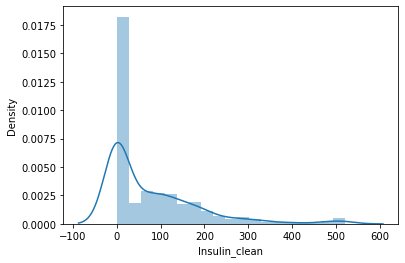

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


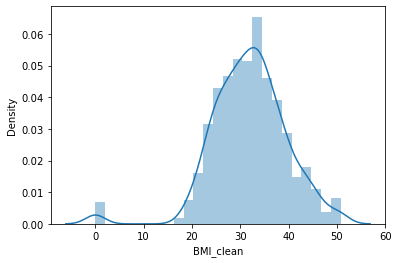

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


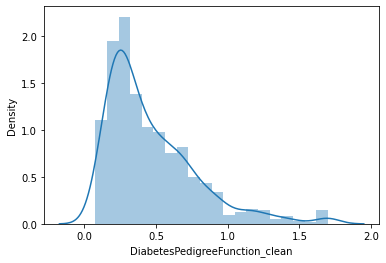

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


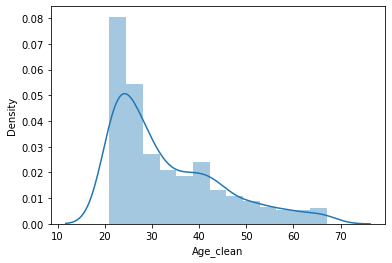

In [34]:
for i in features:
    sns.distplot(df[i+'_clean'], kde=True)
    plt.show()

In [35]:
## Box_Cox_Transformation

QQ plot for Age_clean
for number 1


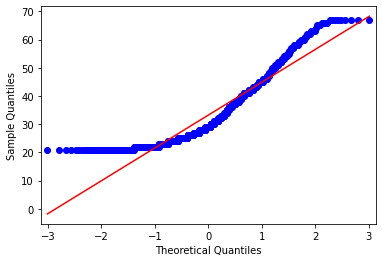

for number 2


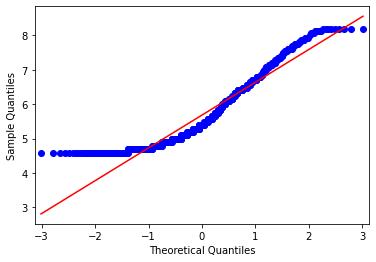

for number 3


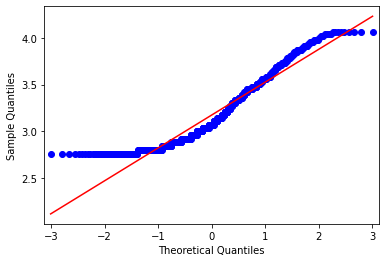

for number 4


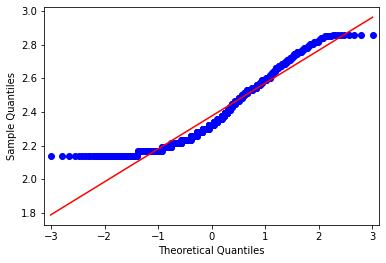

for number 5


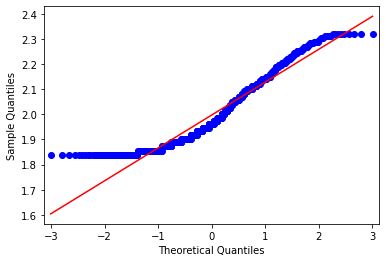

for number 6


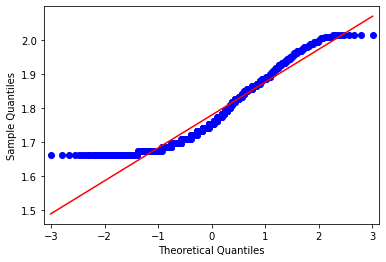

for number 7


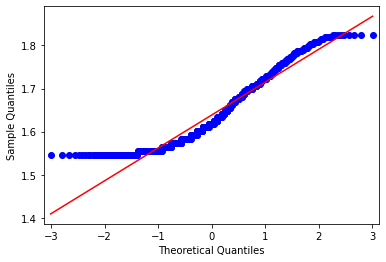

for number 8


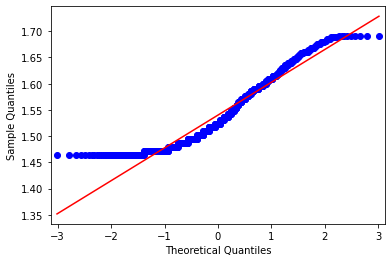

for number 9


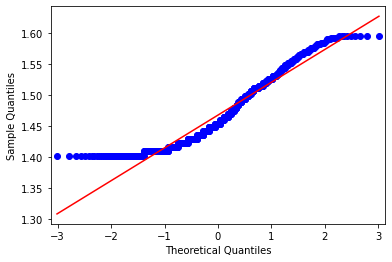

for number 10


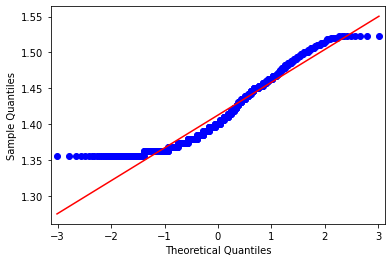

QQ plot for DiabetesPedigreeFunction_clean
for number 1


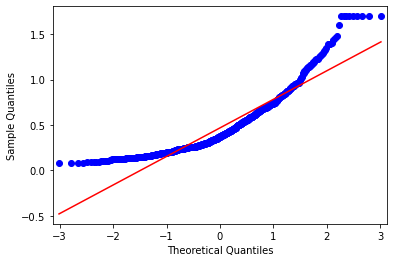

for number 2


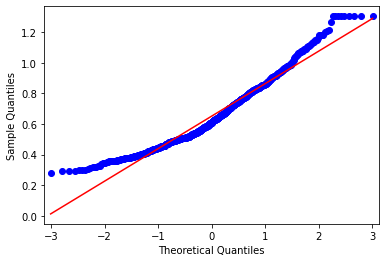

for number 3


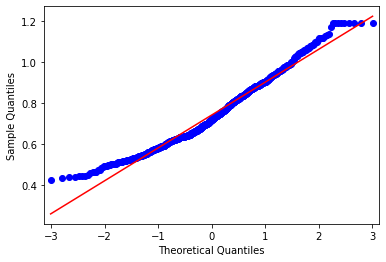

for number 4


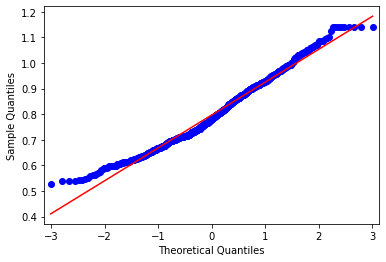

for number 5


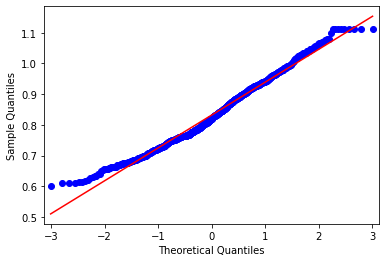

for number 6


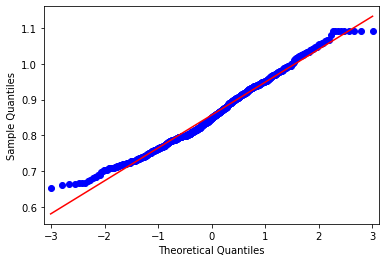

for number 7


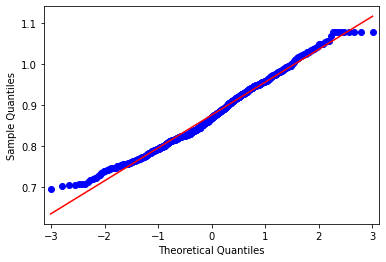

for number 8


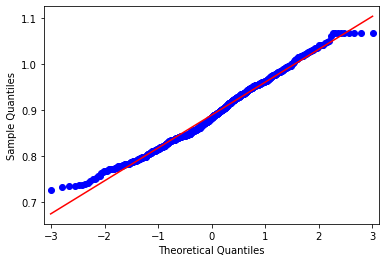

for number 9


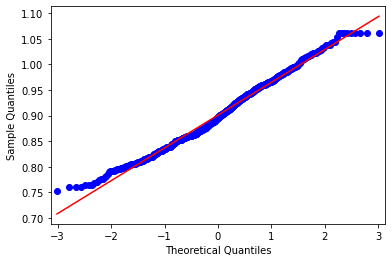

for number 10


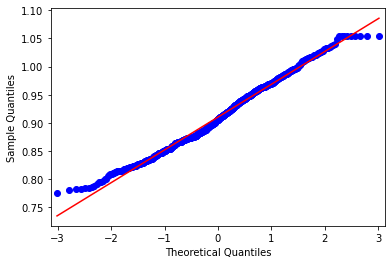

QQ plot for Insulin_clean
for number 1


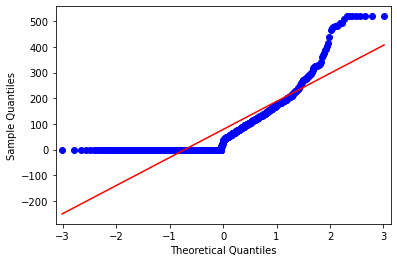

for number 2


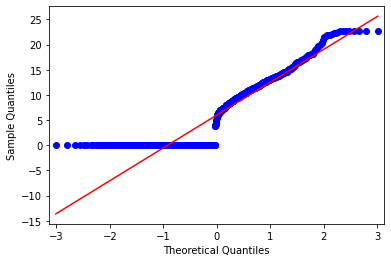

for number 3


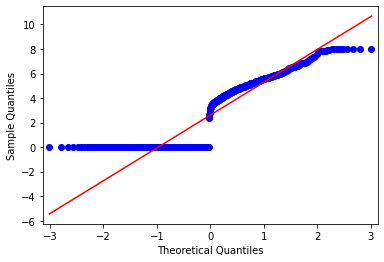

for number 4


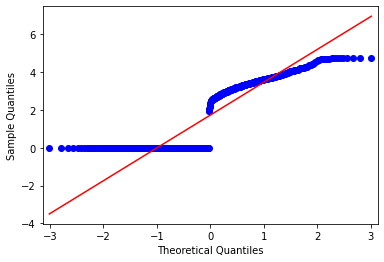

for number 5


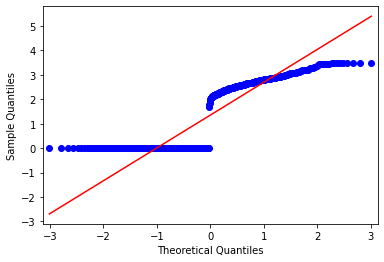

for number 6


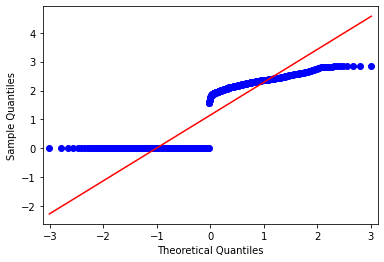

for number 7


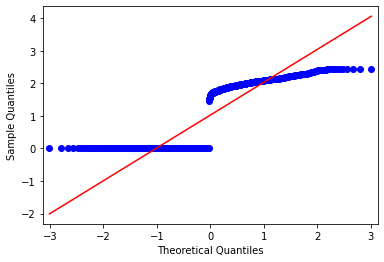

for number 8


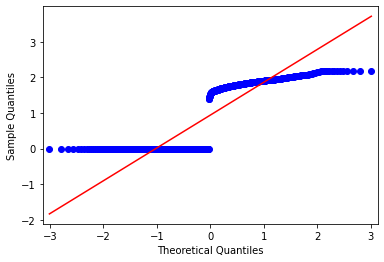

for number 9


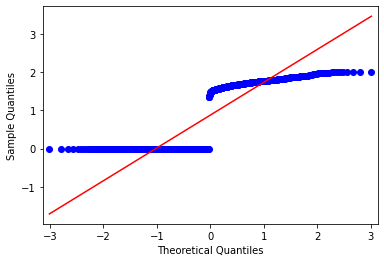

for number 10


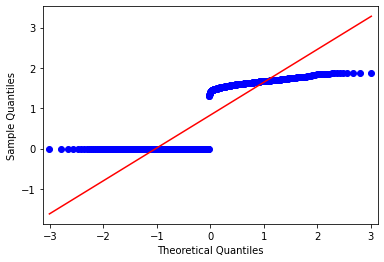

QQ plot for Pregnancies_clean
for number 1


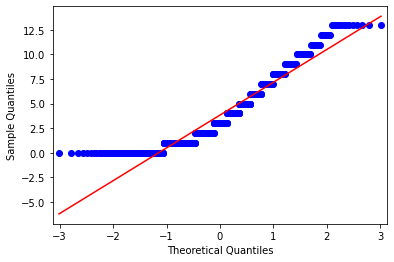

for number 2


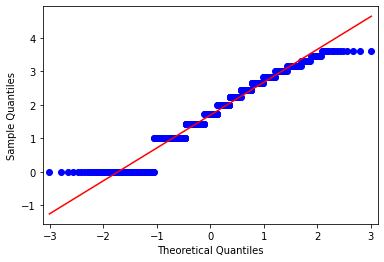

for number 3


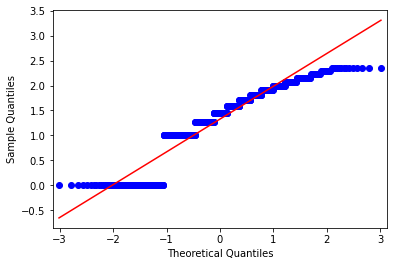

for number 4


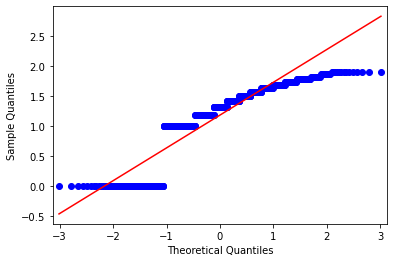

for number 5


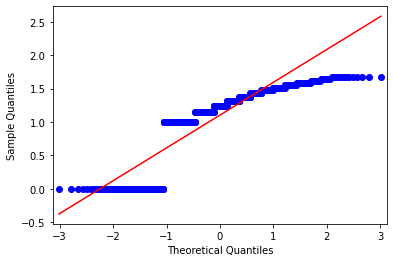

for number 6


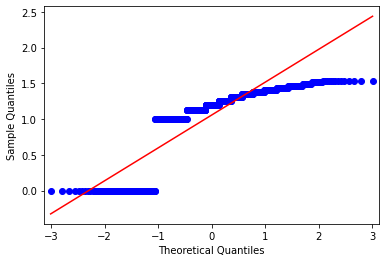

for number 7


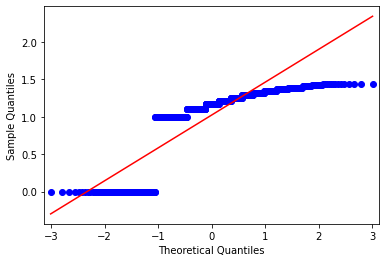

for number 8


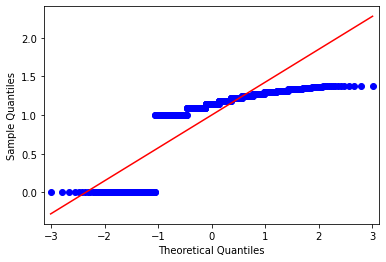

for number 9


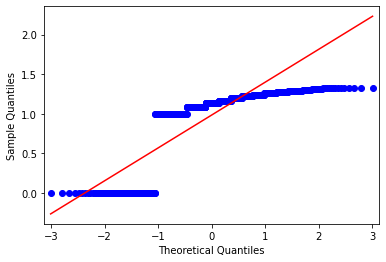

for number 10


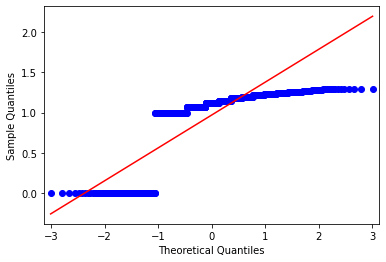

****************************************************************************************************


In [41]:
transforming_features = ['Age_clean', 'DiabetesPedigreeFunction_clean', 'Insulin_clean', 'Pregnancies_clean']
for feature in transforming_features:
    print(f'QQ plot for {feature}')
    for i in range(1, 11):
        print(f'for number {i}')
        data_t = df[feature] ** (1/i)
        qqplot(data_t, line='s')
        plt.show()
print('*'*100)

In [42]:
transforming_features

['Age_clean',
 'DiabetesPedigreeFunction_clean',
 'Insulin_clean',
 'Pregnancies_clean']

***Age_clean***


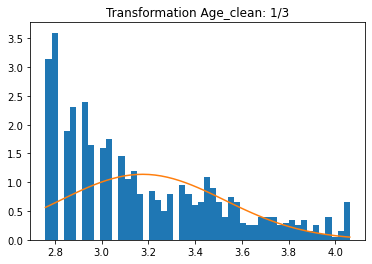

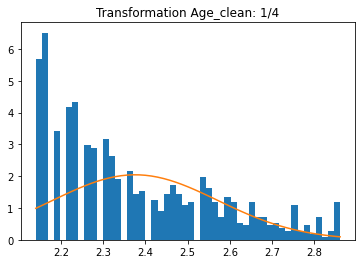

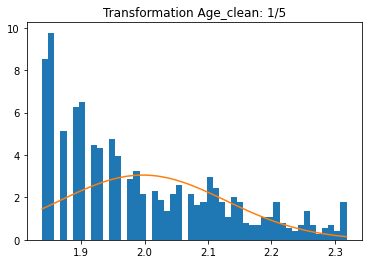

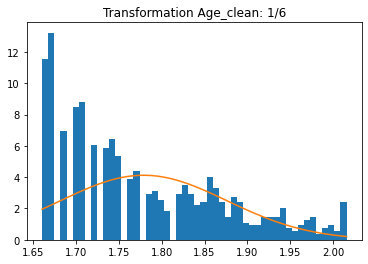

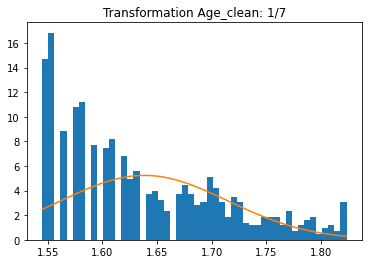

***DiabetesPedigreeFunction_clean***


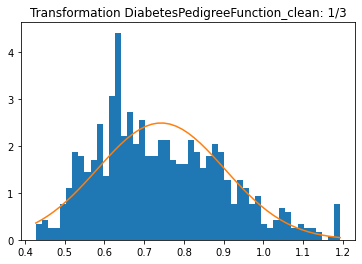

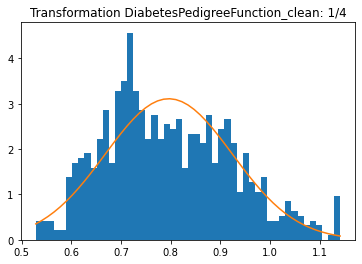

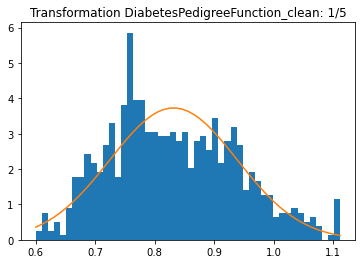

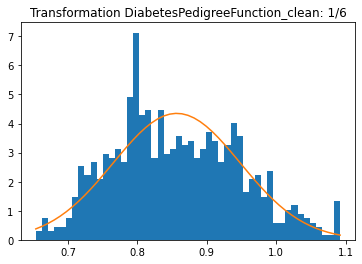

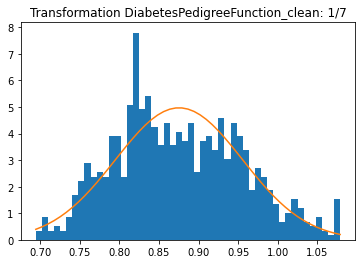

***Insulin_clean***


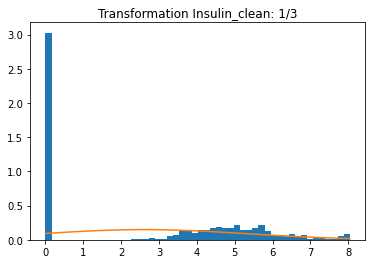

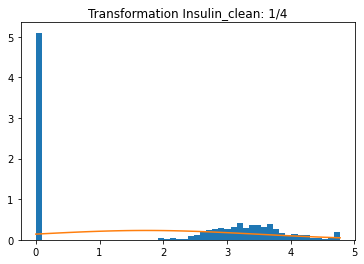

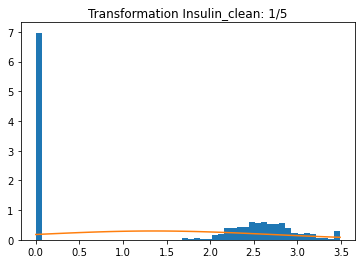

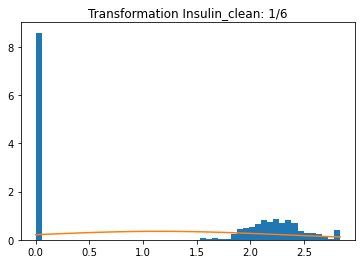

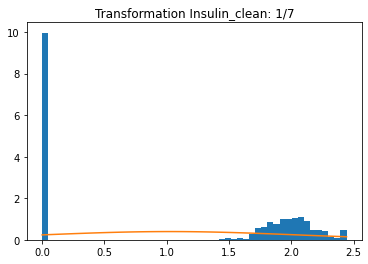

***Pregnancies_clean***


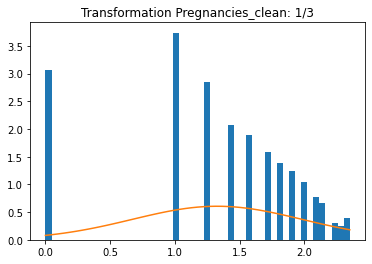

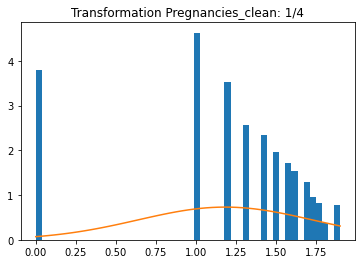

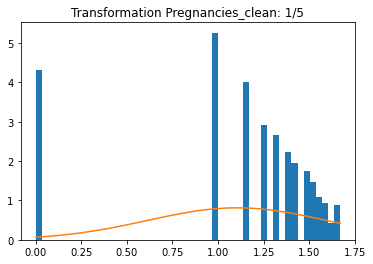

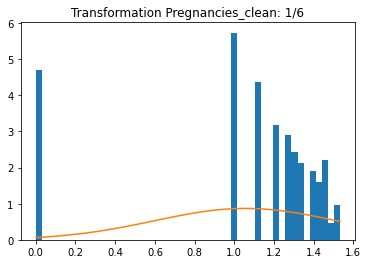

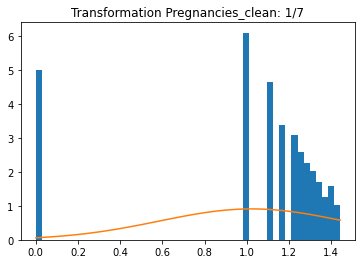

In [45]:
import scipy
for feature in transforming_features:
    print(f'***{feature}***')
    ### Box-Cox Transformation
    for i in [3, 4, 5, 6, 7]:
        data_t = df[feature]**(1/i)
        n, bins, pathes = plt.hist(data_t, 50, density=True)
        mu = np.mean(data_t)
        sigma = np.std(data_t)
        plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
        plt.title('Transformation {}: 1/{}'.format(feature, str(i)))
        plt.show()

In [46]:
df['Age_clean'] = df['Age_clean'] ** (1/6)
df['DiabetesPedigreeFunction_clean'] = df['DiabetesPedigreeFunction_clean'] ** (1/7)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


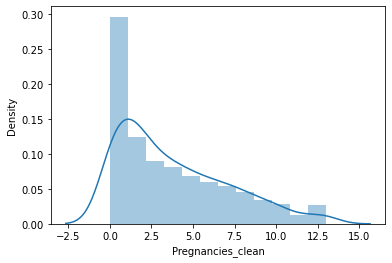

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


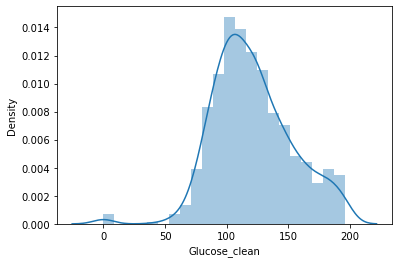

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


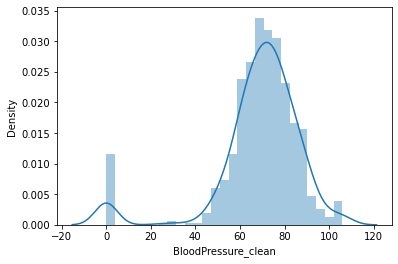

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


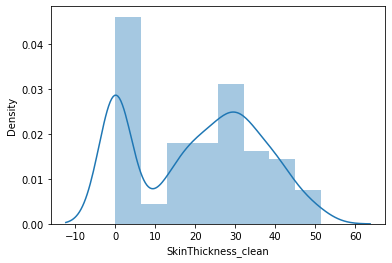

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


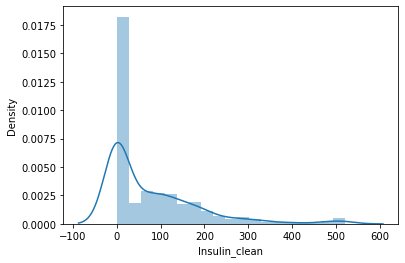

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


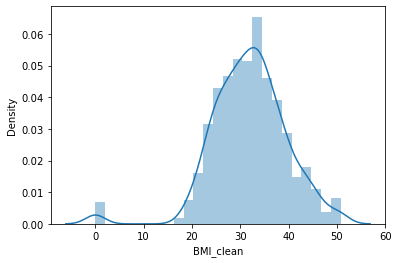

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


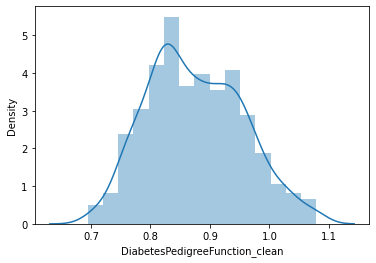

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


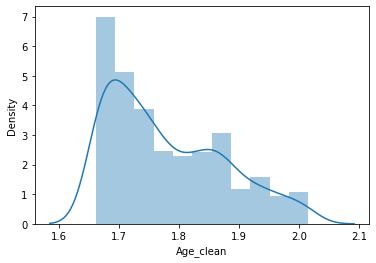

In [47]:
for i in features:
    sns.distplot(df[i+'_clean'], kde=True)
    plt.show()

In [48]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_clean,Glucose_clean,BloodPressure_clean,SkinThickness_clean,Insulin_clean,BMI_clean,DiabetesPedigreeFunction_clean,Age_clean
0,6,148,72,35,0,33.6,0.627,50,1,6,148,72,35.0,0.0,33.6,0.935488,1.919383
1,1,85,66,29,0,26.6,0.351,31,0,1,85,66,29.0,0.0,26.6,0.861081,1.772394
2,8,183,64,0,0,23.3,0.672,32,1,8,183,64,0.0,0.0,23.3,0.944797,1.781797
3,1,89,66,23,94,28.1,0.167,21,0,1,89,66,23.0,94.0,28.1,0.774390,1.661001
4,0,137,40,35,168,43.1,2.288,33,1,0,137,40,35.0,168.0,43.1,1.078600,1.790959
5,5,116,74,0,0,25.6,0.201,30,0,5,116,74,0.0,0.0,25.6,0.795164,1.762734
6,3,78,50,32,88,31.0,0.248,26,1,3,78,50,32.0,88.0,31.0,0.819395,1.721190
7,10,115,0,0,0,35.3,0.134,29,0,10,115,0,0.0,0.0,35.3,0.750414,1.752803
8,2,197,70,45,543,30.5,0.158,53,1,2,196,70,45.0,519.9,30.5,0.768285,1.938114
9,8,125,96,0,0,0.0,0.232,54,1,8,125,96,0.0,0.0,0.0,0.811625,1.944161


In [51]:
## We will split the data into clean and old version of data
df_og = df[features]
df_og.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [53]:
clean_features = []
for feature in features:
    clean_features.append(feature+'_clean')
df_clean = df[clean_features]
df_clean.head(10)

,Pregnancies_clean,Glucose_clean,BloodPressure_clean,SkinThickness_clean,Insulin_clean,BMI_clean,DiabetesPedigreeFunction_clean,Age_clean
0,6,148,72,35.0,0.0,33.6,0.935488,1.919383
1,1,85,66,29.0,0.0,26.6,0.861081,1.772394
2,8,183,64,0.0,0.0,23.3,0.944797,1.781797
3,1,89,66,23.0,94.0,28.1,0.774390,1.661001
4,0,137,40,35.0,168.0,43.1,1.078600,1.790959
5,5,116,74,0.0,0.0,25.6,0.795164,1.762734
6,3,78,50,32.0,88.0,31.0,0.819395,1.721190
7,10,115,0,0.0,0.0,35.3,0.750414,1.752803
8,2,196,70,45.0,519.9,30.5,0.768285,1.938114
9,8,125,96,0.0,0.0,0.0,0.811625,1.944161


In [64]:
## We will use old data
X_old = df_og[features].values
X_old = X_old.T

In [65]:
Y_old = df['Outcome'].values

In [70]:
Y_old.reshape(-1,1)
Y_old.shape

(768,)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_data = sc.fit_transform(X_old, Y_old)
scaled_X_data

array([[-0.804065  , -0.97913448, -0.53014014, ..., -0.99072619,
        -0.77041321, -0.93801338],
       [ 2.26906711,  1.86986107,  2.47504342, ...,  1.64028557,
         2.23374438,  1.93001664],
       [ 0.62429218,  1.22544541,  0.4315186 , ...,  0.52890991,
         0.64754917,  1.21300914],
       ...,
       [-0.206752  , -0.11086917, -0.26740123, ..., -0.50988611,
        -0.07104532, -0.02149074],
       [-0.92034626, -1.00114637, -0.65598005, ..., -1.09857499,
        -0.78605886, -0.95936773],
       [ 0.14817312,  0.03836393, -0.11800068, ..., -0.42369779,
         0.33511678, -0.25218011]])

In [76]:
scaled_X_data.shape

(8, 768)

In [77]:
Y_old

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [78]:
### Logistic Regression Using Neural Network
scaled_X_data = scaled_X_data.T
scaled_X_data.shape

(768, 8)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X_data, Y_old, random_state=22, test_size=0.2, shuffle=True)

array([[-0.91708218,  0.955435  ,  0.20256727, ..., -0.24915337,
        -0.94694593, -0.55030046],
       [-0.73033255,  2.16800003,  0.80284338, ...,  0.10976385,
        -0.83135415,  0.15176867],
       [-0.66711197,  2.4648986 ,  0.35455993, ..., -0.18307397,
        -0.77187521, -0.0976555 ],
       ...,
       [-1.1698791 ,  1.61208295,  1.09961625, ..., -0.3169881 ,
        -1.59529966,  0.1478924 ],
       [-0.98313944,  1.24727236, -0.10176704, ..., -0.40215314,
        -0.98382295, -0.49748526],
       [-0.87716965,  1.29359191, -0.08425674, ..., -0.46771462,
        -0.91153787, -0.5262082 ]])

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(614, 8)
(154, 8)
(154,)
(614,)


In [81]:
### Reshaping data
old_X_train = X_train.T
old_X_test = X_test.T
old_y_train = y_train.reshape(1, -1)
old_y_test = y_test.reshape(1, -1)

In [83]:
print(old_X_train.shape)
print(old_X_test.shape)
print(old_y_train.shape)
print(old_y_test.shape)

(8, 614)
(8, 154)
(1, 614)
(1, 154)


In [84]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [86]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


In [87]:
def initialize_paramters(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0.0
    return w, b

In [88]:
w, b = initialize_paramters(8)
w

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [114]:
def forward_backwards_propagate(W, b, X, Y):
    # number of training examples
    m = X.shape[1]
    
    #forward propagation
    z = np.dot(W.T, X) + b
    A = sigmoid(z)
    cost = (-1/m) * (np.sum((Y*np.log(A)) + ((1-Y)*np.log(1-A))))
    
    #backward propagation
    dz = A-Y
    dw = (1/m) * (np.dot(X, dz.T))
    db = (1/m) * (np.sum(dz))
    
    cost = np.squeeze(np.array(cost))

    
    grads = {"dw": dw,
             "db": db}
    
    return cost, grads

In [155]:
def logistic_regression(w, b, X, Y, num_iterations=2500, learning_rate=0.001):
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    for i in range(num_iterations+1):
        cost, grads = forward_backwards_propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        #update paramters
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        if i % 100 == 0:
            costs.append(cost)
#             print(f'Cost after {i}th iteration is {cost}')
            
    params = {
        'w' : w,
        'b': b
    }
    
    grads = {
        'dw': dw,
        'db': db
    }
    
    return costs, grads, params

In [133]:
def predict_and_Accuracy(w, b, X, Y):
    
    # number of training examples
    m = X.shape[1]
    
    y_predictions = np.zeros(shape=(1, X.shape[1]))
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    for i in range(A.shape[1]):
        
        if A[0, i] > 0.5:
            y_predictions[0, i] = 1
        else:
            y_predictions[0, i] = 0
    
    print(np.mean(Y == y_predictions) *100)
    return y_predictions

In [134]:
def model(X, Y, num_iteration, learning_rate):
    
    # initializing the parameters
    W = np.zeros(shape=(X.shape[0], 1))
    b = 0.0
    
    # calling logistic regression for training data
    costs, grads, params = logistic_regression(W, b, X, Y, num_iteration, learning_rate)
    
    W = params['w']
    b = params['b']
    
    plt.plot(costs)
    plt.show()
    
    y_pred = predict_and_Accuracy(W, b, X, Y)

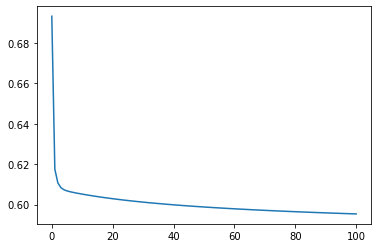

66.61237785016286


In [135]:
# Training model on training data set
model(old_X_train, old_y_train, 10000, 0.1)

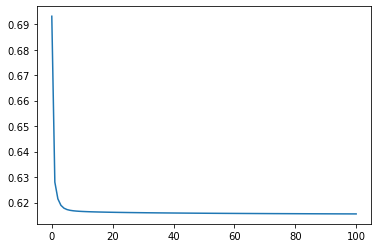

65.5844155844156


In [136]:
# testing test dataset
model(old_X_test, old_y_test, 10000, 0.1)

For 10000 number of iteration
For 0.001 learning rate


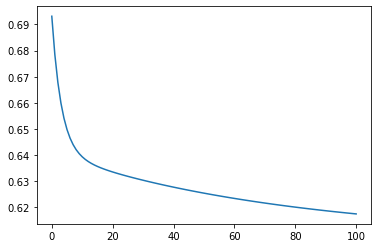

64.98371335504885
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.005 learning rate


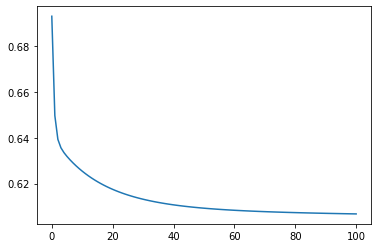

65.63517915309446
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.01 learning rate


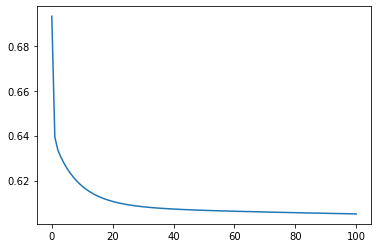

65.96091205211727
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.05 learning rate


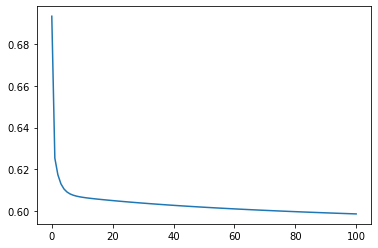

66.12377850162866
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.1 learning rate


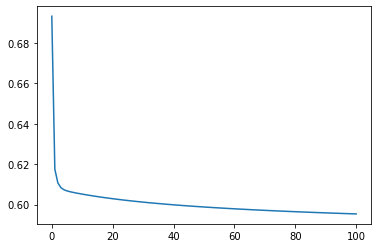

66.61237785016286
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.5 learning rate


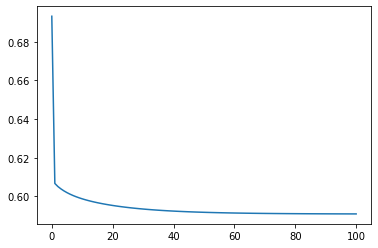

67.26384364820846
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.001 learning rate


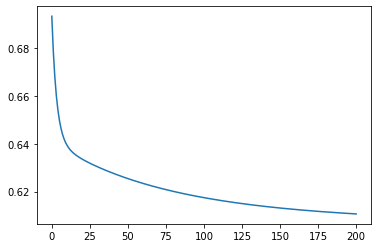

64.98371335504885
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.005 learning rate


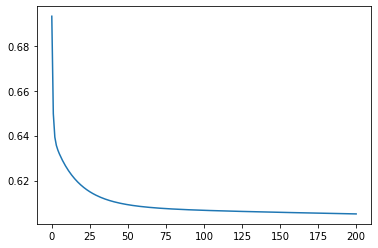

65.96091205211727
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.01 learning rate


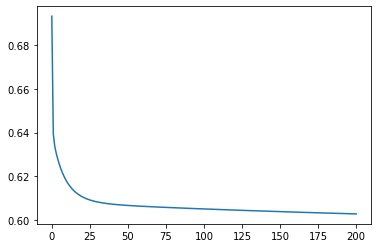

65.63517915309446
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.05 learning rate


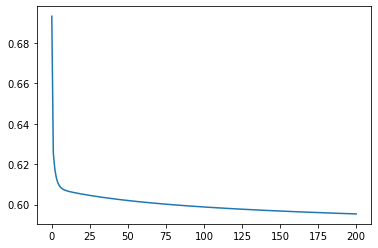

66.61237785016286
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.1 learning rate


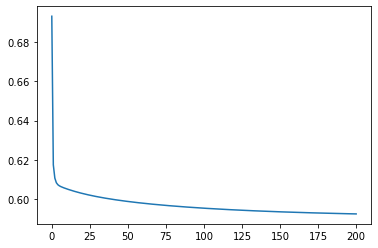

67.58957654723126
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.5 learning rate


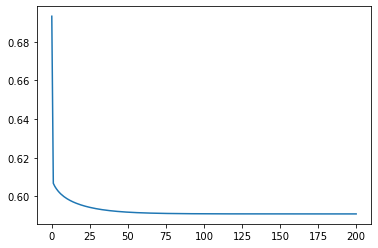

67.26384364820846
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.001 learning rate


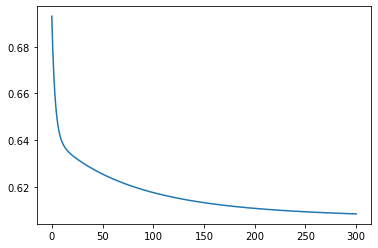

65.14657980456026
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.005 learning rate


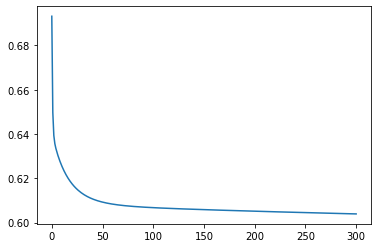

65.63517915309446
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.01 learning rate


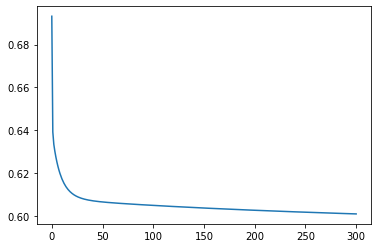

66.12377850162866
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.05 learning rate


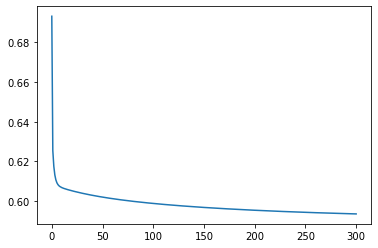

67.26384364820846
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.1 learning rate


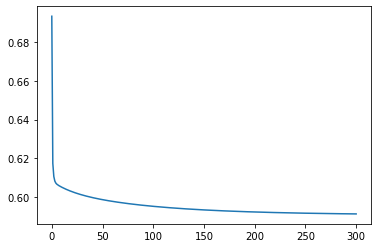

67.75244299674267
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.5 learning rate


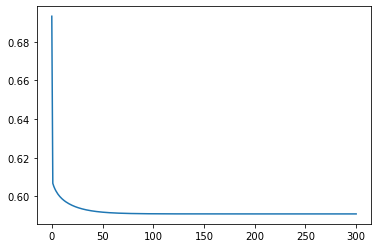

67.26384364820846
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.001 learning rate


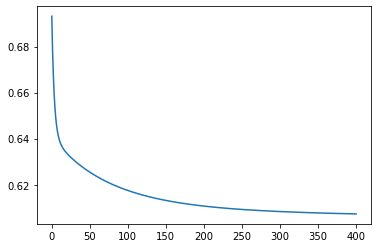

65.30944625407166
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.005 learning rate


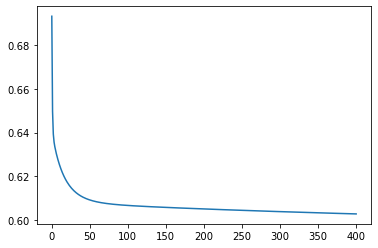

65.63517915309446
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.01 learning rate


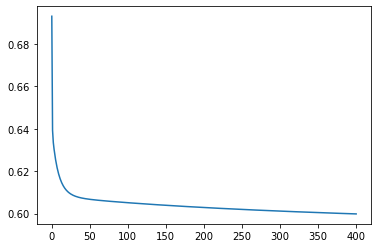

66.44951140065146
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.05 learning rate


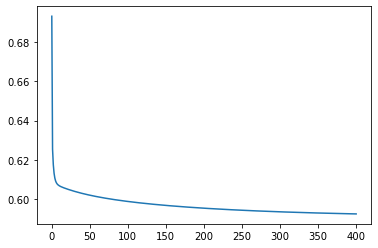

67.58957654723126
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.1 learning rate


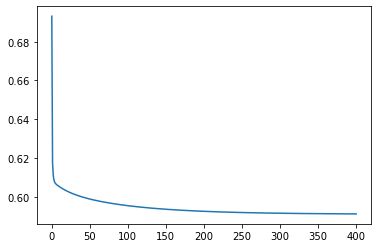

67.10097719869707
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.5 learning rate


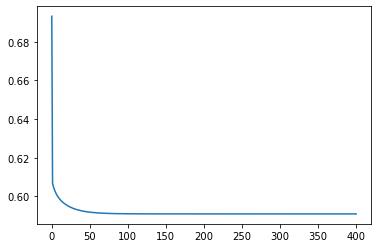

67.26384364820846
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.001 learning rate


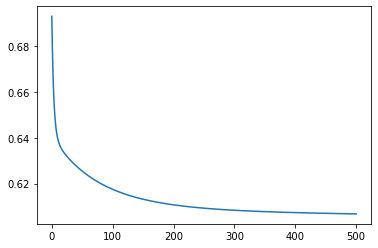

65.63517915309446
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.005 learning rate


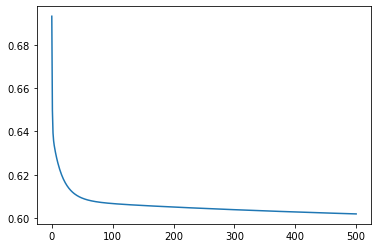

65.96091205211727
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.01 learning rate


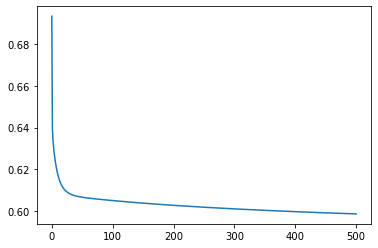

66.12377850162866
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.05 learning rate


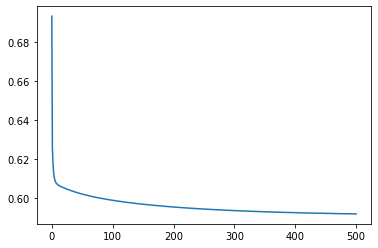

67.42671009771986
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.1 learning rate


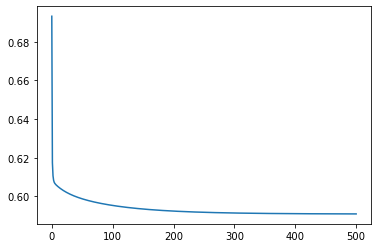

67.26384364820846
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.5 learning rate


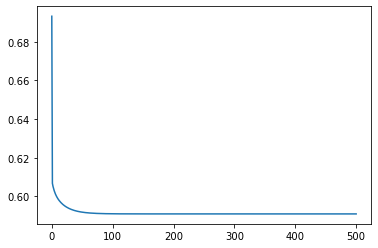

67.26384364820846
********************************************************************************************************************************************************************************************************


In [138]:
## Hyper paramters tuning
for i in [10000, 20000, 30000, 40000, 50000]:
    for j in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
        print(f'For {i} number of iteration')
        print(f'For {j} learning rate')
        model(old_X_train, old_y_train, i, j)
        print("**"*100)

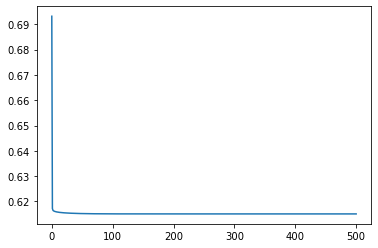

66.23376623376623


In [139]:
## Best parameters values that we got are 50000 iterations and learning rate 0.5
model(old_X_test, old_y_test, 50000, 0.5)

In [140]:
## Checking on clean features values

In [141]:
X_clean = df_clean[clean_features].values
y_clean = df['Outcome'].values

In [142]:
X_clean.shape

(768, 8)

In [144]:
y_clean.shape

(768,)

In [146]:
sc_clean = StandardScaler()
scaled_clean_data = sc_clean.fit_transform(X_clean, y_clean)
scaled_clean_data

array([[ 0.64935582,  0.84943245,  0.15322365, ...,  0.21588234,
         0.75022853,  1.44900748],
       [-0.8500587 , -1.12401131, -0.15877572, ..., -0.69229359,
        -0.17693364, -0.07039195],
       [ 1.24912163,  1.9457901 , -0.26277551, ..., -1.12043367,
         0.86622362,  0.02680921],
       ...,
       [ 0.34947292,  0.00367084,  0.15322365, ..., -0.74418936,
        -0.71410612, -0.17024213],
       [-0.8500587 ,  0.16029336, -0.47077509, ..., -0.23820563,
        -0.18568896,  1.24545425],
       [-0.8500587 , -0.87341527,  0.04922386, ..., -0.1992838 ,
        -0.34152818, -0.9595359 ]])

In [147]:
X_train, X_test, y_train, y_test = train_test_split(scaled_clean_data, y_clean, random_state=22, test_size=0.2, shuffle=True)
X_train.shape

(614, 8)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(614, 8)
(154, 8)
(154,)
(614,)


In [150]:
clean_X_train = X_train.T
clean_X_test = X_test.T
clean_y_train = y_train.reshape(1, -1)
clean_y_test = y_test.reshape(1, -1)

In [151]:
print(clean_X_train.shape)
print(clean_X_test.shape)
print(clean_y_train.shape)
print(clean_y_test.shape)

(8, 614)
(8, 154)
(1, 614)
(1, 154)


Cost after 0th iteration is 0.6931471805599454
Cost after 100th iteration is 0.6802171691475453
Cost after 200th iteration is 0.6683363734586613
Cost after 300th iteration is 0.6574052068083921
Cost after 400th iteration is 0.6473326036198036
Cost after 500th iteration is 0.6380358650066227
Cost after 600th iteration is 0.6294402916625085
Cost after 700th iteration is 0.6214786810572196
Cost after 800th iteration is 0.6140907498501428
Cost after 900th iteration is 0.6072225269291666
Cost after 1000th iteration is 0.6008257490322241
Cost after 1100th iteration is 0.594857280053196
Cost after 1200th iteration is 0.5892785668481156
Cost after 1300th iteration is 0.5840551383258985
Cost after 1400th iteration is 0.579156150408255
Cost after 1500th iteration is 0.5745539766546376
Cost after 1600th iteration is 0.5702238426004919
Cost after 1700th iteration is 0.5661435008506176
Cost after 1800th iteration is 0.5622929434727578
Cost after 1900th iteration is 0.5586541480780125
Cost after 200

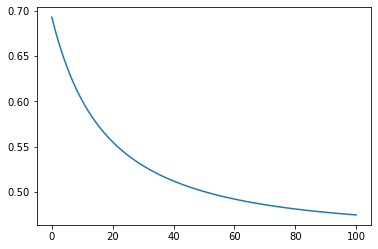

77.68729641693811


In [153]:
# checking on clean training examples
model(clean_X_train, clean_y_train, 10000, 0.001)

Cost after 0th iteration is 0.6931471805599454
Cost after 100th iteration is 0.6804978645532248
Cost after 200th iteration is 0.6687780727424973
Cost after 300th iteration is 0.6579127882514362
Cost after 400th iteration is 0.6478319349730348
Cost after 500th iteration is 0.6384704748464035
Cost after 600th iteration is 0.629768366223232
Cost after 700th iteration is 0.6216704187224255
Cost after 800th iteration is 0.6141260753515347
Cost after 900th iteration is 0.6070891474113945
Cost after 1000th iteration is 0.6005175224837874
Cost after 1100th iteration is 0.5943728610446771
Cost after 1200th iteration is 0.5886202931514061
Cost after 1300th iteration is 0.5832281232806824
Cost after 1400th iteration is 0.5781675487158926
Cost after 1500th iteration is 0.5734123948205849
Cost after 1600th iteration is 0.5689388689940629
Cost after 1700th iteration is 0.5647253339874114
Cost after 1800th iteration is 0.5607521004742482
Cost after 1900th iteration is 0.5570012382426959
Cost after 20

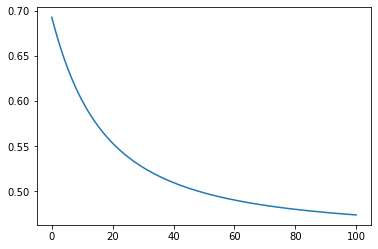

77.27272727272727


In [154]:
# checking on test dataset
model(clean_X_test, clean_y_test, 10000, 0.001)

For 10000 number of iteration
For 0.001 learning rate


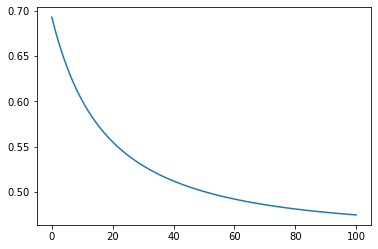

77.68729641693811
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.005 learning rate


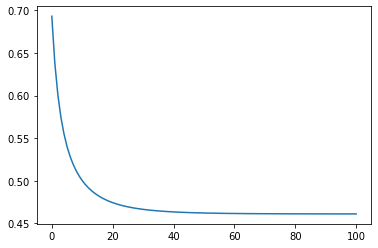

78.66449511400651
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.01 learning rate


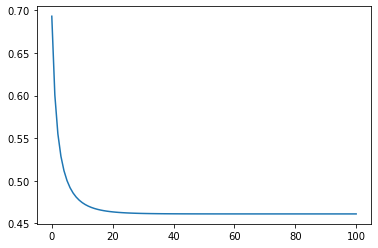

78.50162866449512
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.05 learning rate


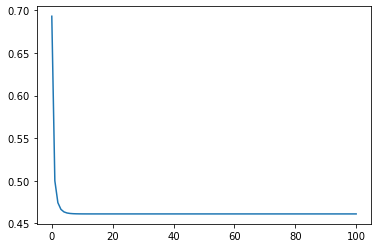

78.50162866449512
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.1 learning rate


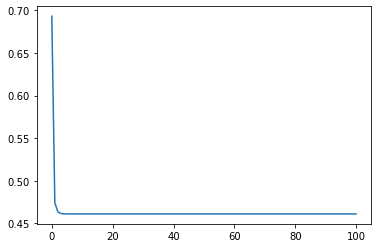

78.50162866449512
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.5 learning rate


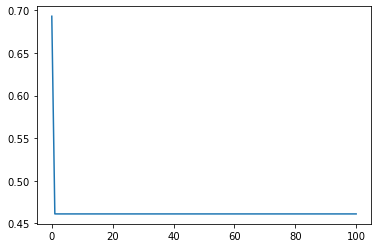

78.50162866449512
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.001 learning rate


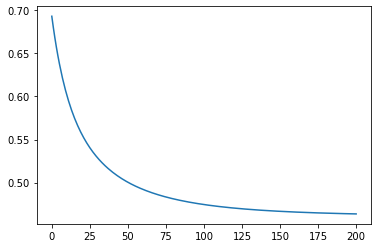

78.17589576547232
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.005 learning rate


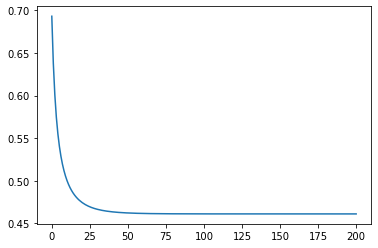

78.50162866449512
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.01 learning rate


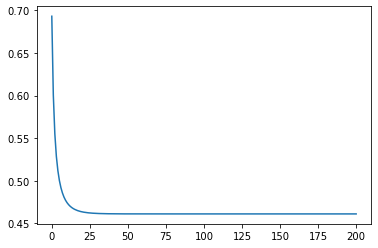

78.50162866449512
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.05 learning rate


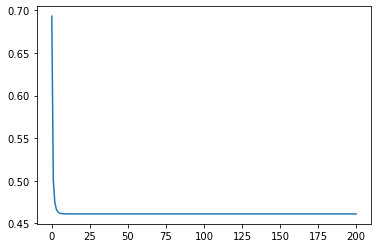

78.50162866449512
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.1 learning rate


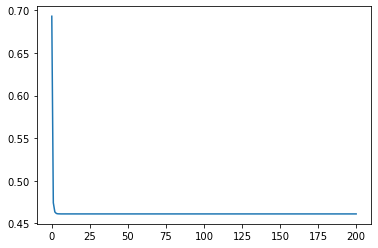

78.50162866449512
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.5 learning rate


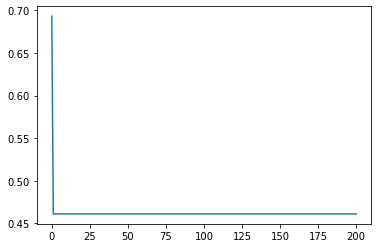

78.50162866449512
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.001 learning rate


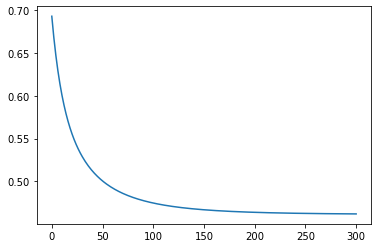

78.66449511400651
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.005 learning rate


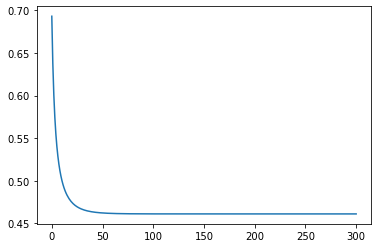

78.50162866449512
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.01 learning rate


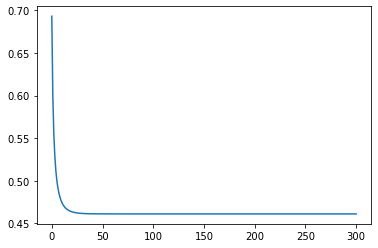

78.50162866449512
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.05 learning rate


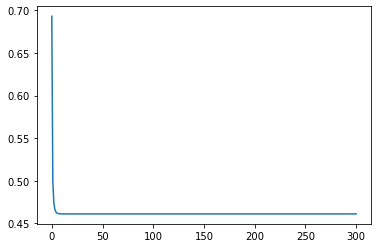

78.50162866449512
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.1 learning rate


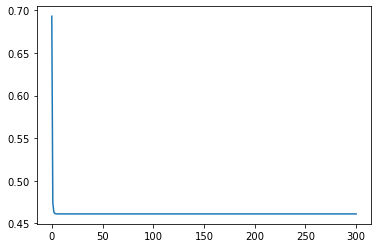

78.50162866449512
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.5 learning rate


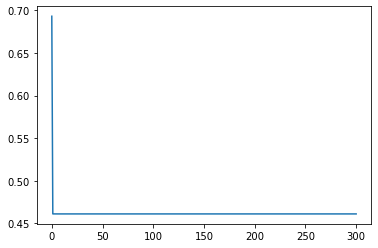

78.50162866449512
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.001 learning rate


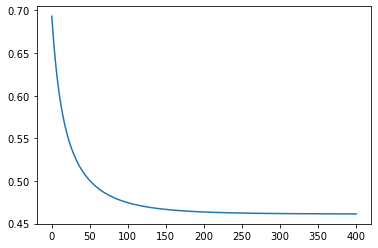

78.66449511400651
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.005 learning rate


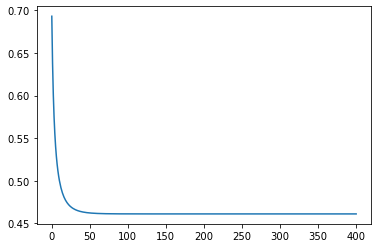

78.50162866449512
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.01 learning rate


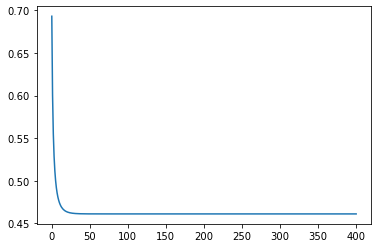

78.50162866449512
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.05 learning rate


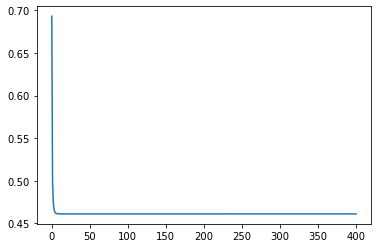

78.50162866449512
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.1 learning rate


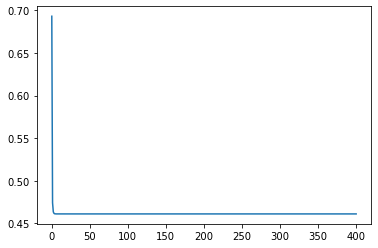

78.50162866449512
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.5 learning rate


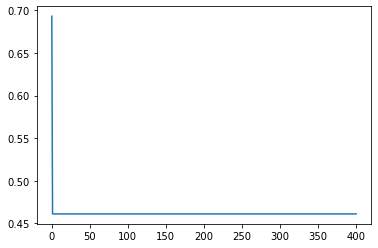

78.50162866449512
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.001 learning rate


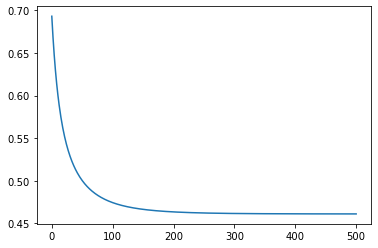

78.66449511400651
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.005 learning rate


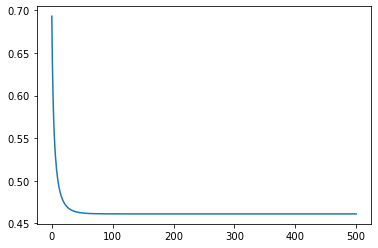

78.50162866449512
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.01 learning rate


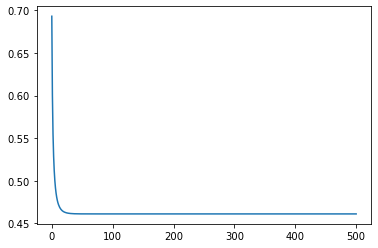

78.50162866449512
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.05 learning rate


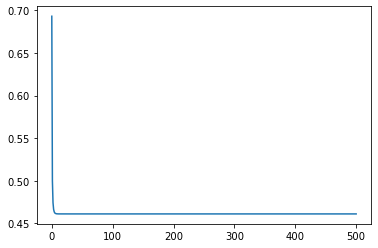

78.50162866449512
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.1 learning rate


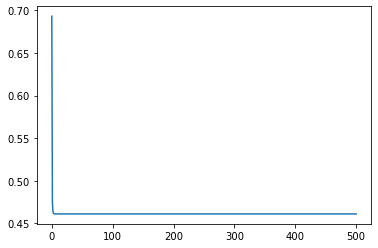

78.50162866449512
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.5 learning rate


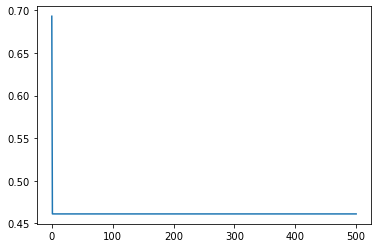

78.50162866449512
********************************************************************************************************************************************************************************************************


In [156]:
## Hyper paramters tuning
for i in [10000, 20000, 30000, 40000, 50000]:
    for j in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
        print(f'For {i} number of iteration')
        print(f'For {j} learning rate')
        model(clean_X_train, clean_y_train, i, j)
        print("**"*100)

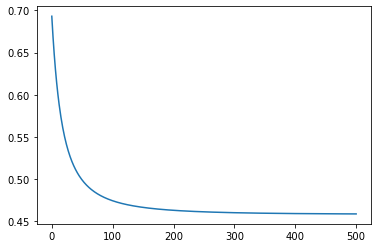

78.57142857142857


In [157]:
### best parameters that we got are number of iterations 50000, learning rate 0.001
model(clean_X_test, clean_y_test, 50000, 0.001)

In [162]:
### Using sklearn logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(old_X_train.T, old_y_train.reshape(-1, 1))
# lr.predict(old_X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [164]:
old_predictions = lr.predict(old_X_test.T)

In [165]:
np.mean(old_predictions == old_y_test.reshape(-1, 1))*100

62.413560465508525

In [166]:
lr_clean = LogisticRegression()
lr_clean.fit(clean_X_train.T, clean_y_train.reshape(-1, 1))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [168]:
clean_predictions = lr_clean.predict(clean_X_test.T)

In [169]:
np.mean(clean_predictions == clean_y_test.reshape(-1, 1))*100

58.53432282003711

In [170]:
df_og

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [171]:
### Building 1 layer NN

In [173]:
scaled_X_data

array([[-0.804065  ,  2.26906711,  0.62429218, ..., -0.206752  ,
        -0.92034626,  0.14817312],
       [-0.97913448,  1.86986107,  1.22544541, ..., -0.11086917,
        -1.00114637,  0.03836393],
       [-0.53014014,  2.47504342,  0.4315186 , ..., -0.26740123,
        -0.65598005, -0.11800068],
       ...,
       [-0.99072619,  1.64028557,  0.52890991, ..., -0.50988611,
        -1.09857499, -0.42369779],
       [-0.77041321,  2.23374438,  0.64754917, ..., -0.07104532,
        -0.78605886,  0.33511678],
       [-0.93801338,  1.93001664,  1.21300914, ..., -0.02149074,
        -0.95936773, -0.25218011]])

In [174]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X_data, Y_old, random_state=22, shuffle=True, test_size=0.2)

In [178]:
old_X_train = X_train.T
old_X_test = X_test.T
old_y_train = y_train.reshape(1, -1)
old_y_test = y_test.reshape(1, -1)

In [181]:
print(old_X_train.shape)
print(old_X_test.shape)
print(old_y_train.shape)
print(old_y_test.shape)

(8, 614)
(8, 154)
(1, 614)
(1, 154)


In [210]:
def initialize_layer_size(X, Y):
    
    # number of input layer 
    n_x = X.shape[0]
    #number of hidden layer 
    n_h = 4
    #number of output layer
    n_y = Y.shape[0]
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01 
    b2 = np.zeros(shape=(n_y, 1))
    
    params = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }
    
    return params

In [211]:
def forward_propagate(X, y, params):
    
    # fetching parameters
    m = X.shape[1]
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
#     print(W1.shape)
    Z1 = np.dot(W1, X) + b
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1)
    A2 = sigmoid(Z2)
    
    cost = (-1/m) * (np.sum((y*np.log(A2)) + ((1-y)*(np.log(1-A2)))))
    cost = float(np.squeeze(cost))
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    
    return A2, cost, cache

In [212]:
params = initialize_layer_size(old_X_train, old_y_train)
A2, cost, cache = forward_propagate(old_X_train, old_y_train, params)

In [213]:
def backward_propagate(X, y, cache, params):
    
    # fetching paramteres 
    m = X.shape[1]
    A1 = cache['A1']
    Z1 = cache['Z1']
    A2 = cache['A2']
    Z2 = cache['Z2']
    W1 = params['W1']
    W2 = params['W2']
    
    
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * (np.sum(dZ2, keepdims=True, axis=1))
    dZ1 = np.dot(W2.T, dZ2) * (1-np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m)*(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {
        'dZ2': dZ2,
        'dW2': dW2,
        'db2': db2,
        'dZ1': dZ1,
        'dW1': dW1,
        'db1': db1
    }
    
    return grads

In [235]:
def optimize_one_NN(X, y, num_iterations=1000, leraning_rate = 0.01):
    
    m = X.shape[1]
    
    #initializing the parameters
    params = initialize_layer_size(X, y)
    
    W1 = copy.deepcopy(params['W1'])
    W2 = copy.deepcopy(params['W2'])
    b1 = copy.deepcopy(params['b1'])
    b2 = copy.deepcopy(params['b2'])
    
    costs = []
    
    for i in range(num_iterations + 1):
        A2, cost, cache = forward_propagate(X, y, params)
        grads = backward_propagate(X, y, cache, params)
        
        dW2 = grads['dW2']
        db2 = grads['db2']
        dW1 = grads['dW1']
        db1 = grads['db1']
        
        # updating the parameters
        W2 = W2 - (leraning_rate * dW2)
        b2 = b2 - (leraning_rate * db2)
        W1 = W1 - (leraning_rate * dW1)
        b1 = b1 - (leraning_rate * db1)
        
        params['W1'] = W1
        params['b1'] = b1
        params['W2'] = W2
        params['b2'] = b2
        
        if i % 100 == 0:
            costs.append(cost)
#             print(f'After {i}th iteration, cost is {cost}')
            
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    gradients = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
        
    return costs, parameters, gradients

In [219]:
def predict(X, y, parameters):
    
    #fetching parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b
    A2 = sigmoid(Z2)
    
    y_predictions = np.zeros(shape=(1, y.shape[1]))
    
    for i in range(A2.shape[1]):
        
        if A2[0, i] > 0.5:
            y_predictions[0, i] = 1
        else:
            y_predictions[0, i] = 0
            
    print(f'Accuracy of the model is {np.mean(y_predictions == y) * 100}')
    
    

In [220]:
def one_layer_model(X, y, num_iterations, learning_rate):
    
    costs, parameters, gradients = optimize_one_NN(X, y, num_iterations, learning_rate)
    
    plt.plot(costs)
    plt.title('Cost vs number of iterations')
    plt.show()
    
    
    predict(X, y, parameters)


After 0th iteration, cost is 0.6932173238954438
After 100th iteration, cost is 0.6932110159052755
After 200th iteration, cost is 0.6932050867031769
After 300th iteration, cost is 0.6931995011031935
After 400th iteration, cost is 0.6931942259642822
After 500th iteration, cost is 0.6931892299930008
After 600th iteration, cost is 0.6931844835573125
After 700th iteration, cost is 0.6931799585103855
After 800th iteration, cost is 0.69317562802333
After 900th iteration, cost is 0.6931714664258685
After 1000th iteration, cost is 0.6931674490539901
After 1100th iteration, cost is 0.6931635521036773
After 1200th iteration, cost is 0.6931597524898385
After 1300th iteration, cost is 0.6931560277096074
After 1400th iteration, cost is 0.6931523557092013
After 1500th iteration, cost is 0.6931487147535573
After 1600th iteration, cost is 0.693145083297974
After 1700th iteration, cost is 0.6931414398610138
After 1800th iteration, cost is 0.693137762897923
After 1900th iteration, cost is 0.6931340306738

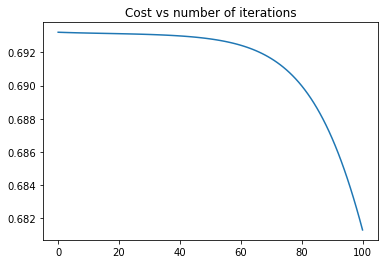

Accuracy of the model is 65.14657980456026


In [222]:
# testing with training dataset
one_layer_model(old_X_train, old_y_train, 10000, 0.001)

After 0th iteration, cost is 0.6931242135863185
After 100th iteration, cost is 0.6931169611130864
After 200th iteration, cost is 0.6931095537681617
After 300th iteration, cost is 0.6931019534106851
After 400th iteration, cost is 0.6930941209379117
After 500th iteration, cost is 0.6930860160877614
After 600th iteration, cost is 0.6930775972362296
After 700th iteration, cost is 0.693068821188726
After 800th iteration, cost is 0.6930596429644045
After 900th iteration, cost is 0.6930500155725251
After 1000th iteration, cost is 0.6930398897798806
After 1100th iteration, cost is 0.6930292138683002
After 1200th iteration, cost is 0.6930179333812233
After 1300th iteration, cost is 0.6930059908583235
After 1400th iteration, cost is 0.6929933255571399
After 1500th iteration, cost is 0.692979873160659
After 1600th iteration, cost is 0.6929655654697752
After 1700th iteration, cost is 0.6929503300795452
After 1800th iteration, cost is 0.6929340900381451
After 1900th iteration, cost is 0.69291676348

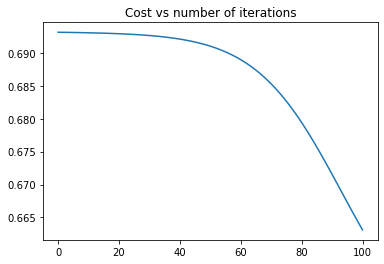

Accuracy of the model is 64.93506493506493


In [223]:
# testing with test dataset
one_layer_model(old_X_test, old_y_test, 10000, 0.001)

For 10000 number of iteration
For 0.001 learning rate


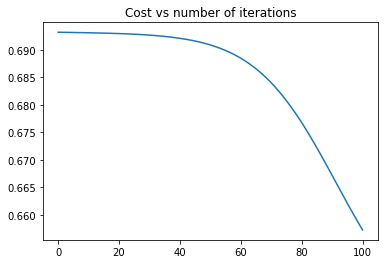

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.005 learning rate


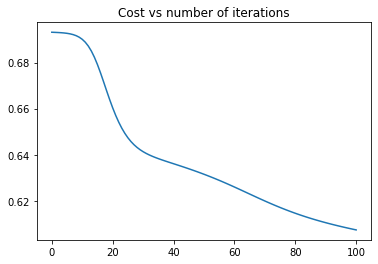

Accuracy of the model is 65.47231270358306
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.01 learning rate


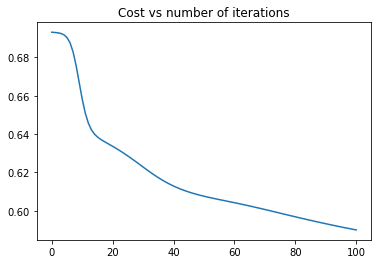

Accuracy of the model is 68.24104234527687
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.05 learning rate


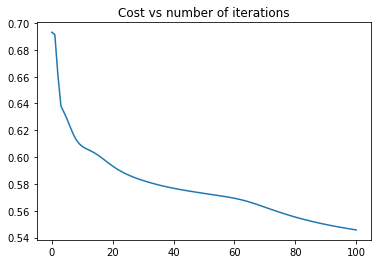

Accuracy of the model is 73.45276872964169
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.1 learning rate


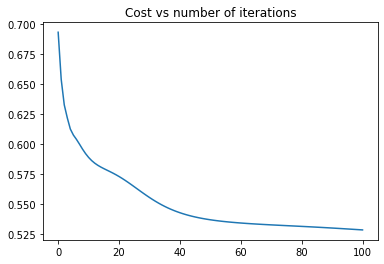

Accuracy of the model is 74.1042345276873
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.5 learning rate


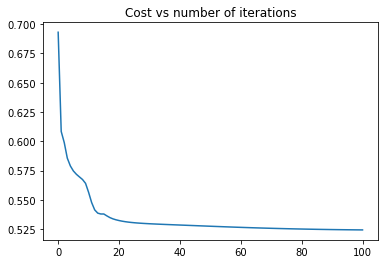

Accuracy of the model is 73.45276872964169
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.001 learning rate


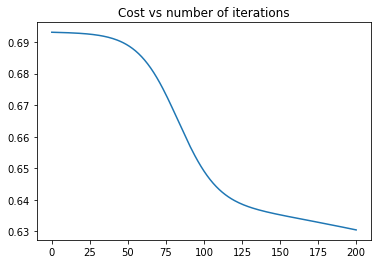

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.005 learning rate


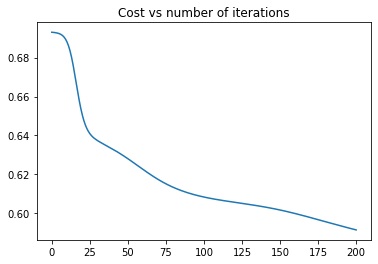

Accuracy of the model is 67.26384364820846
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.01 learning rate


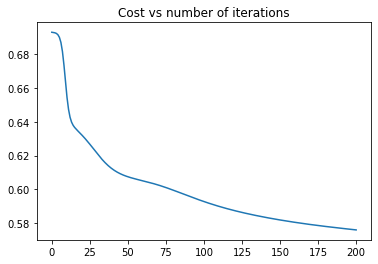

Accuracy of the model is 67.26384364820846
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.05 learning rate


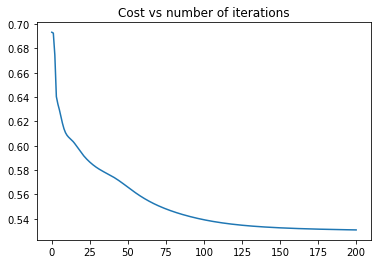

Accuracy of the model is 74.9185667752443
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.1 learning rate


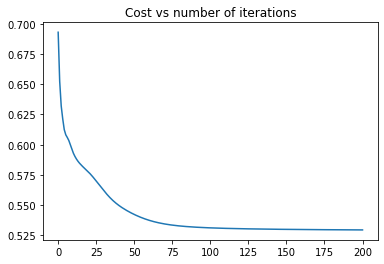

Accuracy of the model is 74.9185667752443
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.5 learning rate


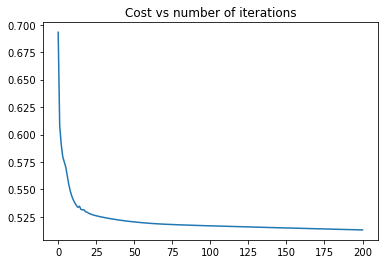

Accuracy of the model is 73.7785016286645
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.001 learning rate


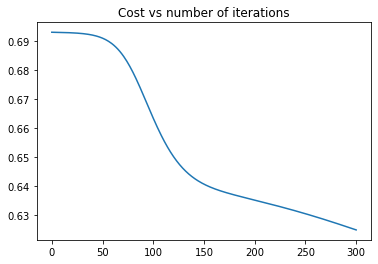

Accuracy of the model is 65.79804560260585
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.005 learning rate


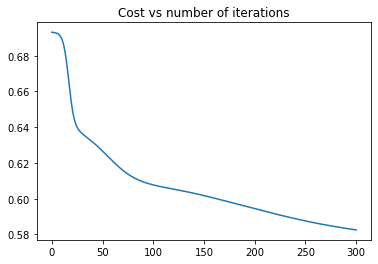

Accuracy of the model is 67.26384364820846
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.01 learning rate


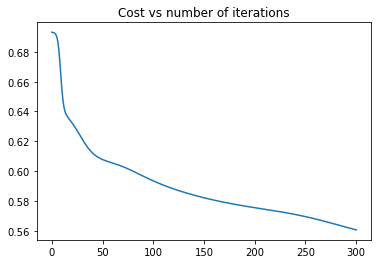

Accuracy of the model is 70.03257328990227
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.05 learning rate


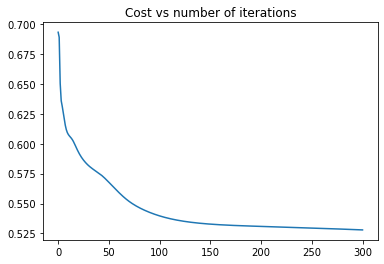

Accuracy of the model is 74.7557003257329
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.1 learning rate


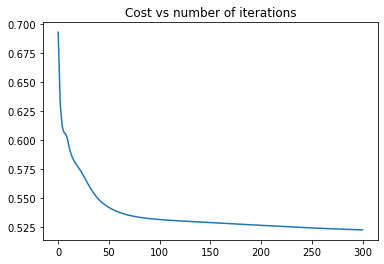

Accuracy of the model is 75.2442996742671
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.5 learning rate


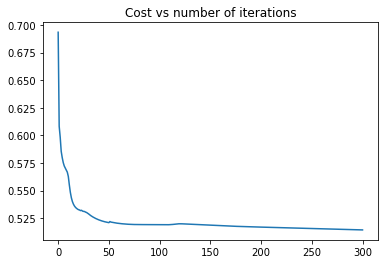

Accuracy of the model is 74.5928338762215
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.001 learning rate


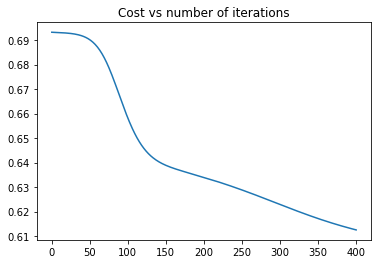

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.005 learning rate


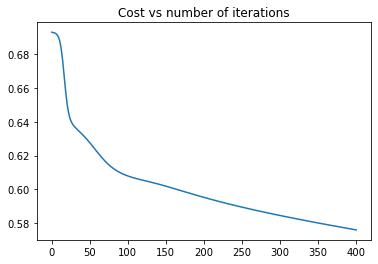

Accuracy of the model is 69.38110749185668
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.01 learning rate


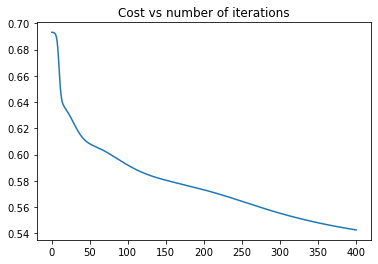

Accuracy of the model is 73.7785016286645
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.05 learning rate


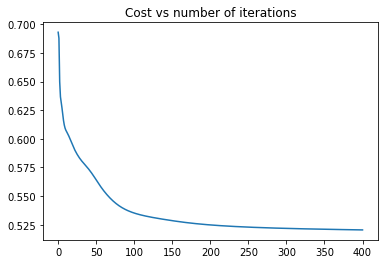

Accuracy of the model is 73.61563517915309
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.1 learning rate


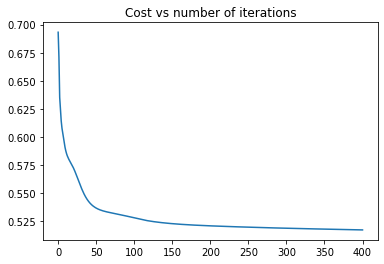

Accuracy of the model is 73.9413680781759
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.5 learning rate


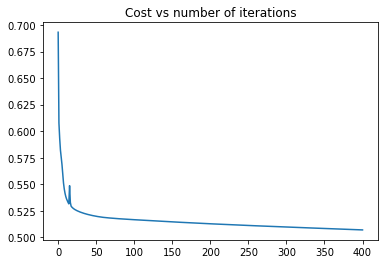

Accuracy of the model is 73.61563517915309
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.001 learning rate


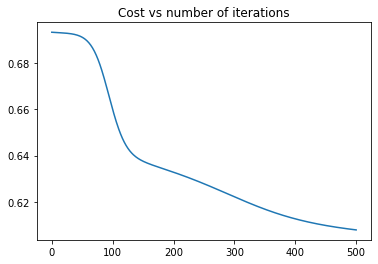

Accuracy of the model is 65.79804560260585
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.005 learning rate


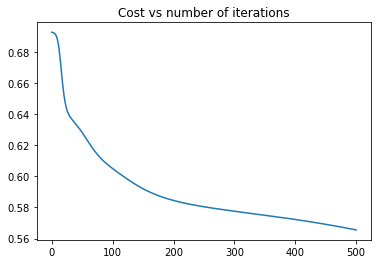

Accuracy of the model is 70.84690553745928
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.01 learning rate


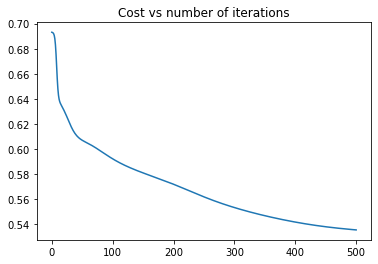

Accuracy of the model is 73.9413680781759
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.05 learning rate


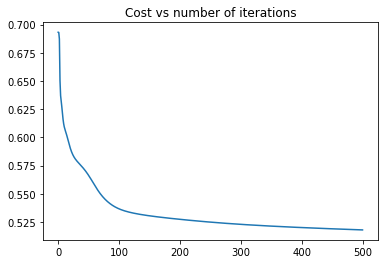

Accuracy of the model is 73.7785016286645
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.1 learning rate


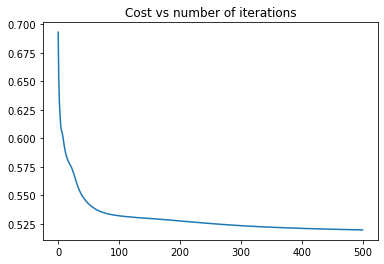

Accuracy of the model is 75.0814332247557
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.5 learning rate


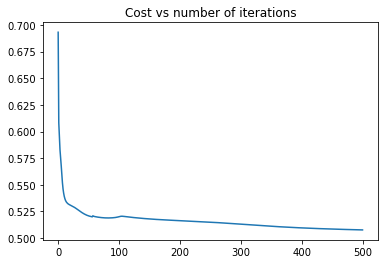

Accuracy of the model is 74.9185667752443
********************************************************************************************************************************************************************************************************


In [226]:
## Hyper paramters tuning
for i in [10000, 20000, 30000, 40000, 50000]:
    for j in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
        print(f'For {i} number of iteration')
        print(f'For {j} learning rate')
        one_layer_model(old_X_train, old_y_train, i, j)
        print("**"*100)

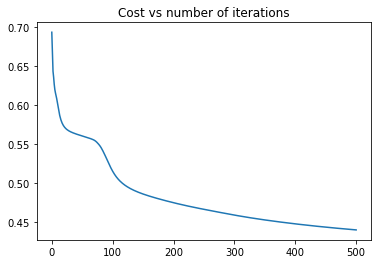

Accuracy of the model is 78.57142857142857


In [227]:
## Best parameters that we got are 50000 iterartions and 0.1 learning rate
one_layer_model(old_X_test, old_y_test, 50000, 0.1)

In [229]:
## One hidden layer model for cleaned version of data
X_train, X_test, y_train, y_test = train_test_split(scaled_clean_data, y_clean, random_state=22, shuffle=True, test_size=0.2)

In [230]:
clean_X_train = X_train.T
clean_X_test = X_test.T
clean_y_train = y_train.reshape(1, -1)
clean_y_test = y_test.reshape(1, -1)

After 0th iteration, cost is 0.6931368385072093
After 100th iteration, cost is 0.6931321023526434
After 200th iteration, cost is 0.6931272993378251
After 300th iteration, cost is 0.6931224080253079
After 400th iteration, cost is 0.6931174065899907
After 500th iteration, cost is 0.6931122727222947
After 600th iteration, cost is 0.6931069835292987
After 700th iteration, cost is 0.6931015154334077
After 800th iteration, cost is 0.6930958440681217
After 900th iteration, cost is 0.6930899441704559
After 1000th iteration, cost is 0.6930837894695595
After 1100th iteration, cost is 0.6930773525710605
After 1200th iteration, cost is 0.6930706048366528
After 1300th iteration, cost is 0.6930635162584217
After 1400th iteration, cost is 0.6930560553273893
After 1500th iteration, cost is 0.6930481888957415
After 1600th iteration, cost is 0.6930398820321699
After 1700th iteration, cost is 0.6930310978697515
After 1800th iteration, cost is 0.6930217974457505
After 1900th iteration, cost is 0.693011939

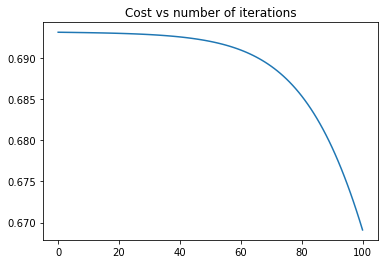

Accuracy of the model is 71.9869706840391


In [232]:
## testing one layer model on cleaned training examples
one_layer_model(clean_X_train, clean_y_train, 10000, 0.001)

After 0th iteration, cost is 0.6930961714130495
After 100th iteration, cost is 0.6930911743329614
After 200th iteration, cost is 0.6930859339754017
After 300th iteration, cost is 0.6930804275981945
After 400th iteration, cost is 0.693074631314161
After 500th iteration, cost is 0.6930685199889439
After 600th iteration, cost is 0.6930620671336742
After 700th iteration, cost is 0.693055244792045
After 800th iteration, cost is 0.6930480234213495
After 900th iteration, cost is 0.6930403717670084
After 1000th iteration, cost is 0.6930322567301009
After 1100th iteration, cost is 0.6930236432273827
After 1200th iteration, cost is 0.693014494043256
After 1300th iteration, cost is 0.6930047696731266
After 1400th iteration, cost is 0.6929944281575651
After 1500th iteration, cost is 0.6929834249066514
After 1600th iteration, cost is 0.6929717125138618
After 1700th iteration, cost is 0.6929592405588285
After 1800th iteration, cost is 0.6929459553982669
After 1900th iteration, cost is 0.692931799944

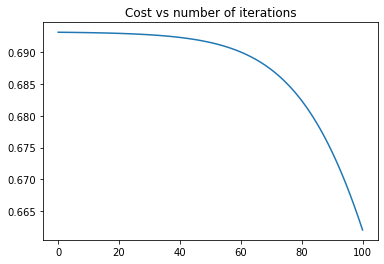

Accuracy of the model is 76.62337662337663


In [233]:
## testing one layer model on cleaned test dataset
one_layer_model(clean_X_test, clean_y_test, 10000, 0.001)

For 10000 number of iteration
For 0.001 learning rate


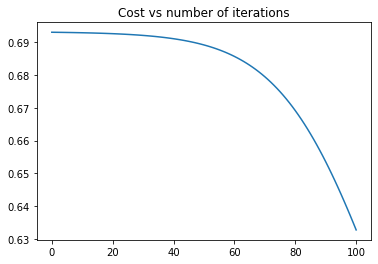

Accuracy of the model is 74.02597402597402
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.005 learning rate


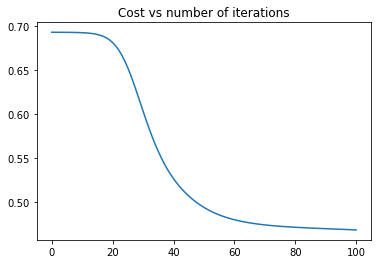

Accuracy of the model is 78.57142857142857
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.01 learning rate


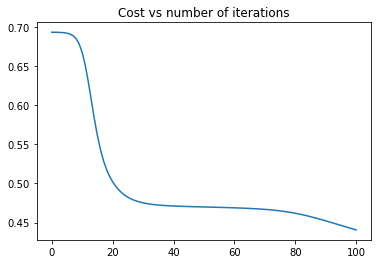

Accuracy of the model is 79.22077922077922
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.05 learning rate


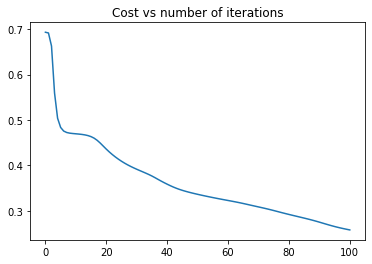

Accuracy of the model is 91.55844155844156
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.1 learning rate


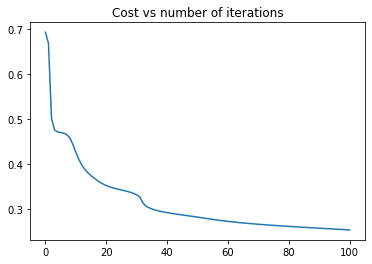

Accuracy of the model is 89.6103896103896
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.5 learning rate


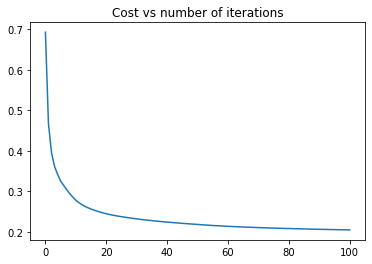

Accuracy of the model is 92.20779220779221
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.001 learning rate


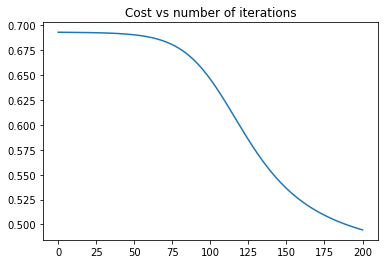

Accuracy of the model is 74.02597402597402
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.005 learning rate


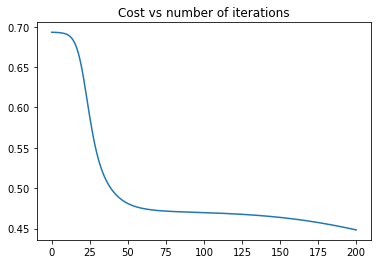

Accuracy of the model is 80.51948051948052
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.01 learning rate


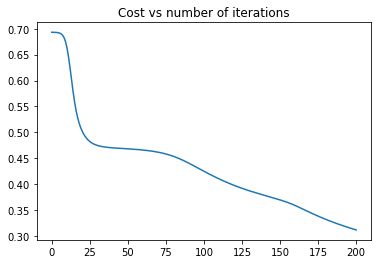

Accuracy of the model is 84.4155844155844
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.05 learning rate


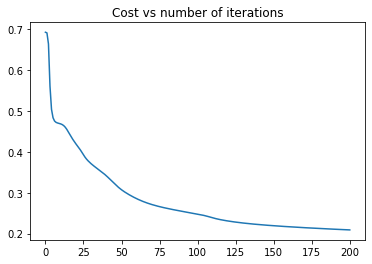

Accuracy of the model is 88.31168831168831
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.1 learning rate


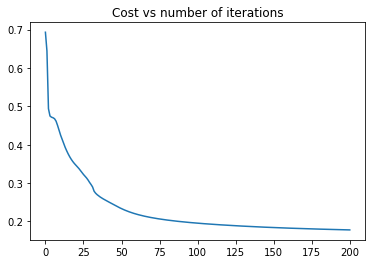

Accuracy of the model is 89.6103896103896
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.5 learning rate


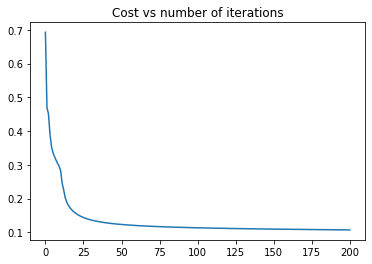

Accuracy of the model is 96.1038961038961
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.001 learning rate


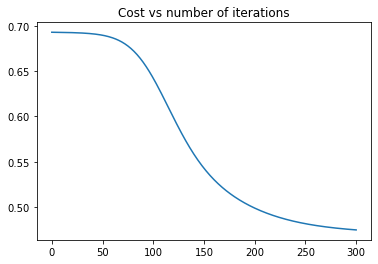

Accuracy of the model is 75.97402597402598
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.005 learning rate


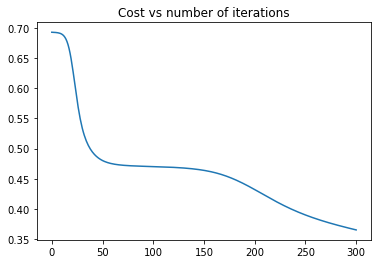

Accuracy of the model is 81.16883116883116
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.01 learning rate


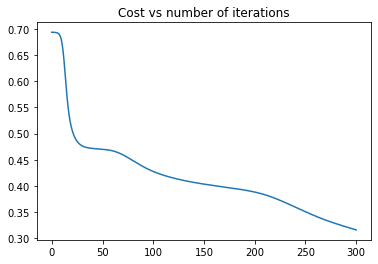

Accuracy of the model is 89.6103896103896
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.05 learning rate


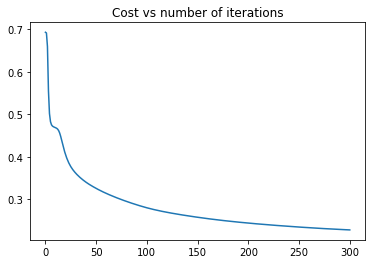

Accuracy of the model is 90.25974025974025
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.1 learning rate


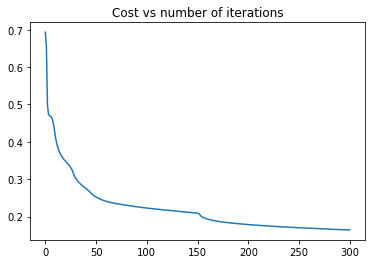

Accuracy of the model is 92.20779220779221
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.5 learning rate


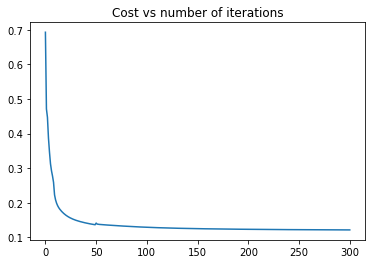

Accuracy of the model is 94.8051948051948
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.001 learning rate


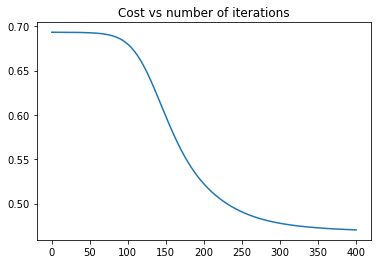

Accuracy of the model is 77.27272727272727
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.005 learning rate


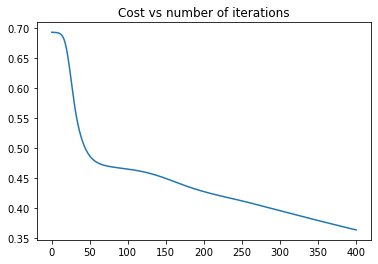

Accuracy of the model is 82.46753246753246
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.01 learning rate


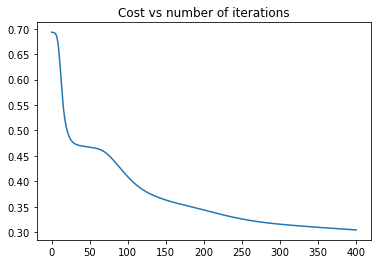

Accuracy of the model is 86.36363636363636
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.05 learning rate


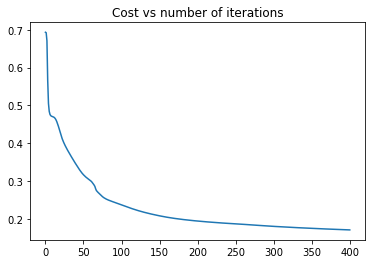

Accuracy of the model is 94.15584415584416
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.1 learning rate


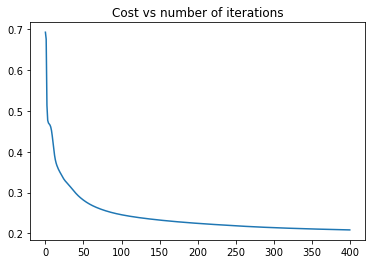

Accuracy of the model is 92.85714285714286
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.5 learning rate


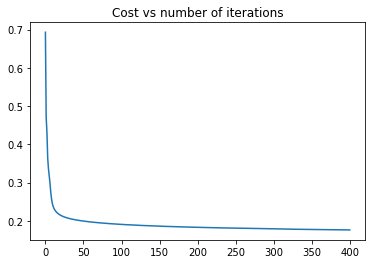

Accuracy of the model is 94.8051948051948
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.001 learning rate


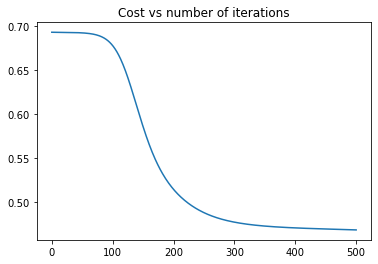

Accuracy of the model is 79.22077922077922
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.005 learning rate


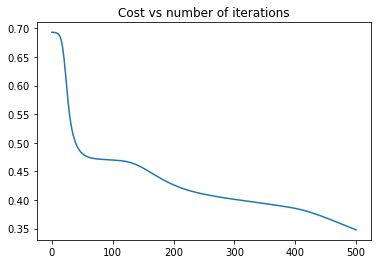

Accuracy of the model is 87.01298701298701
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.01 learning rate


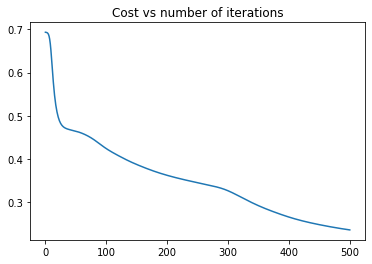

Accuracy of the model is 90.9090909090909
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.05 learning rate


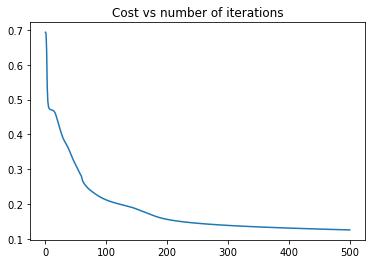

Accuracy of the model is 92.20779220779221
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.1 learning rate


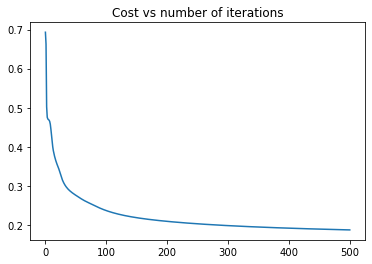

Accuracy of the model is 92.85714285714286
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.5 learning rate


<ipython-input-211-72fc72127b42>:15: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (np.sum((y*np.log(A2)) + ((1-y)*(np.log(1-A2)))))
<ipython-input-211-72fc72127b42>:15: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * (np.sum((y*np.log(A2)) + ((1-y)*(np.log(1-A2)))))


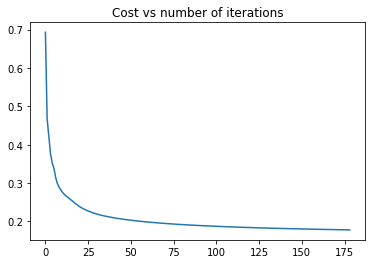

Accuracy of the model is 94.15584415584416
********************************************************************************************************************************************************************************************************


In [236]:
## Hyper paramters tuning
for i in [10000, 20000, 30000, 40000, 50000]:
    for j in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
        print(f'For {i} number of iteration')
        print(f'For {j} learning rate')
        one_layer_model(clean_X_test, clean_y_test, i, j)
        print("**"*100)

<ipython-input-211-72fc72127b42>:15: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (np.sum((y*np.log(A2)) + ((1-y)*(np.log(1-A2)))))
<ipython-input-211-72fc72127b42>:15: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * (np.sum((y*np.log(A2)) + ((1-y)*(np.log(1-A2)))))


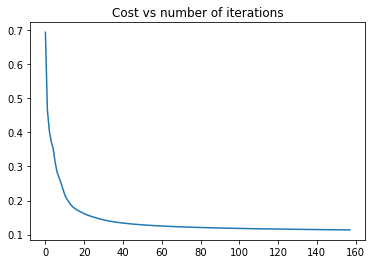

Accuracy of the model is 94.8051948051948


In [237]:
### Best parameters that we got for cleaned data set are 40000 iterations and 0.5 learning rate
one_layer_model(clean_X_test, clean_y_test, 40000, 0.5)

In [238]:
### Building L-layer neural network

In [241]:
def initialize_deep_network(X, y, layer_dims):
    
    # number of training examples
    m = X.shape[1]
    parameters = {}
    for i in range(1, len(layer_dims)):
        
        parameters['W'+str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1]) * 0.01
        parameters['b'+str(i)] = np.zeros(shape=(layer_dims[i], 1))
    
    return parameters

In [247]:
layer_dims = [8, 4, 7, 9, 1]
parameters = initialize_deep_network(old_X_train, old_y_train, layer_dims)
for key, value in parameters.items():
    print(value.shape)

(4, 8)
(4, 1)
(7, 4)
(7, 1)
(9, 7)
(9, 1)
(1, 9)
(1, 1)


In [248]:
print(old_X_train.shape)
print(old_X_test.shape)
print(old_y_train.shape)
print(old_y_test.shape)

(8, 614)
(8, 154)
(1, 614)
(1, 154)


In [335]:
def linear_forward(X, W, b):
    
    # calculating Z values
    Z = np.dot(W, X) + b
    cache = (X, W, b)
    
    return Z, cache

In [336]:
def linear_activation_forward(A, W, b, activation):
    
    if activation == 'tanh':
        Z, linear_cache = linear_forward(A, W, b)
        A = np.tanh(Z)
        activation_cache = Z
    
    if activation == 'sigmoid':
        Z, linear_cache = linear_forward(A, W, b)
        A = sigmoid(Z)
        activation_cache = Z
        
    caches = (linear_cache, activation_cache)
    
    return A, caches

In [337]:
def l_layer_forward(X, parameters):
    
    m = X.shape[1]
    L = len(parameters) // 2
    A = X
    caches = []
    for i in range(1, L):
#         print(f'Calculating forward pass for layer {i}')
        A_prev = A
        A,cache  = linear_activation_forward(A_prev, parameters['W'+str(i)], parameters['b'+str(i)], 'tanh')
        caches.append(cache)
    
#     print(f'Layer - {L}')
    AL, cacheL = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], 'sigmoid')
    caches.append(cacheL)
    
    return AL, caches

In [338]:
def compute_cost(AL, Y):
    
    m = AL.shape[1]
    cost = (-1/m) * (np.sum((Y*np.log(AL)) + ((1-Y)*(np.log(1-AL)))))
    cost = np.squeeze(cost)
    return cost

In [339]:
def linear_backward(dZ, linear_cache):
    
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    
    
    dW = (1/m) * (np.dot(dZ, A_prev.T))
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [340]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    if activation == 'tanh':
        Al = np.tanh(activation_cache)
        dZ = dA * (1-np.power(Al, 2))
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    if activation == 'sigmoid':
        Al = sigmoid(activation_cache)
        dZ = dA * (Al * (1-Al))
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [345]:
def l_model_backward(AL, caches, Y):
    
    m = AL.shape[1]
    grads = {}
    L = len(caches)
    Y = Y.reshape(AL.shape)
    
    #derivative of cost w.r.t AL
    dAL = - (np.divide(Y, AL) - np.divide((1-Y), (1-AL)))
    
    # for last layer
    Lcache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, Lcache, 'sigmoid')
    grads['dA_prev'+str(L-1)] = dA_prev_temp
    grads['dW'+str(L)] = dW_temp
    grads['db'+str(L)] = db_temp
    
    
    for l in reversed(range(L-1)):
#         print(l+1)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA_prev'+str(l+1)], current_cache, 'tanh')
        grads['dA_prev'+str(l)] = dA_prev_temp
        grads['dW'+str(l+1)] = dW_temp
        grads['db'+str(l+1)] = db_temp
        
    return grads
        

In [346]:
def update_parameters(params, grads, learning_rate):
    
    params_copy = copy.deepcopy(params)
    L = len(params) // 2
    for l in range(L):
        params['W'+str(l+1)] = params['W'+str(l+1)] - (learning_rate*grads['dW'+str(l+1)])
        params['b'+str(l+1)] = params['b'+str(l+1)] - (learning_rate * grads['db'+str(l+1)])
    
    return params
    

In [365]:
def L_layer_model(X, Y, num_iterations, learning_rate):
    m = X.shape[1]
    layer_dims = [X.shape[0], 20, 7, 5, 1]
    parameters = initialize_deep_network(X, Y, layer_dims)
    costs = []
    
    for i in range(num_iterations):
        
        # computing forward pass
        AL, caches = l_layer_forward(X, parameters)

        #computing cost
        cost = compute_cost(AL, Y)

        #computing backward pass
        grads = l_model_backward(AL, caches, Y)
        
        #update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        
        if i % 100 == 0:
#             print(f'Cost after {i}th iteration is {cost}')
            costs.append(cost)
    
    
    
    plt.plot(costs)
    plt.title('Cost vs Iterations')
    plt.show()
    
    y_predictions = np.zeros(shape=(1, Y.shape[1]))
    AL, caches = l_layer_forward(X, parameters)
    
    for i in range(AL.shape[1]):
        if AL[0, i] > 0.5:
            y_predictions[0, i] = 1
        else:
            y_predictions[0, i] = 0
    
    print(f'Accuracy of the model is {np.mean(y_predictions == Y) * 100}')
            
    return parameters, costs

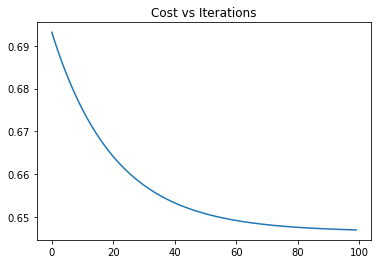

Accuracy of the model is 65.14657980456026


In [366]:
parameters_final, costs = L_layer_model(old_X_train, old_y_train, 10000, 0.001)

In [367]:
# testing on traing data set
predict(old_X_train, old_y_train, parameters_final)

Accuracy of the model is 65.14657980456026


In [362]:
# testing on testing dataset
predict(old_X_test, old_y_test, parameters_final)

Accuracy of the model is 64.93506493506493


For 10000 number of iteration
For 0.001 learning rate


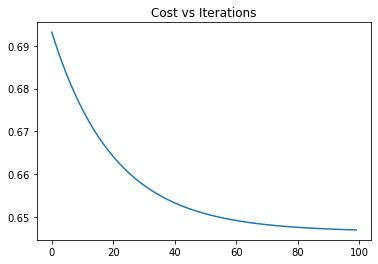

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.005 learning rate


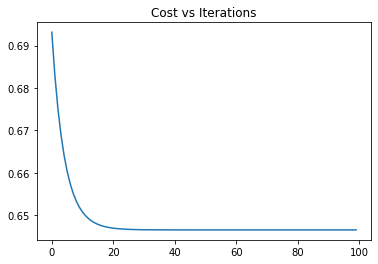

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.01 learning rate


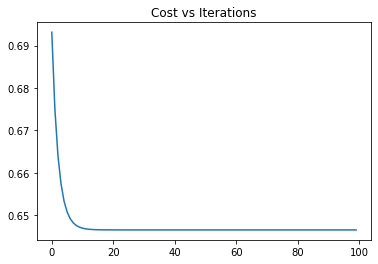

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.05 learning rate


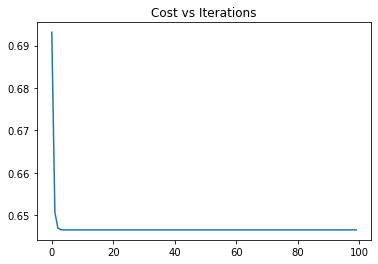

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.1 learning rate


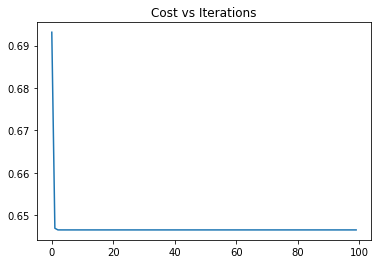

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 10000 number of iteration
For 0.5 learning rate


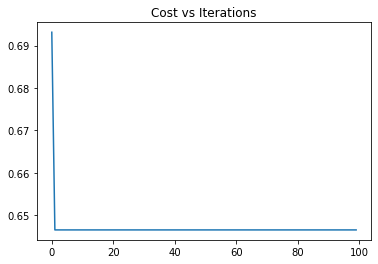

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.001 learning rate


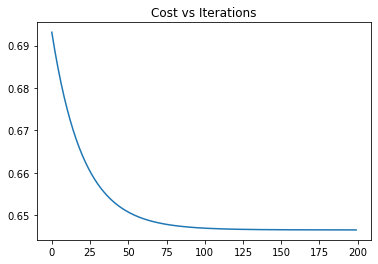

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.005 learning rate


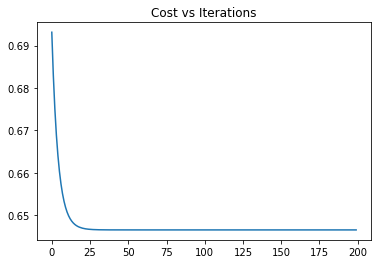

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.01 learning rate


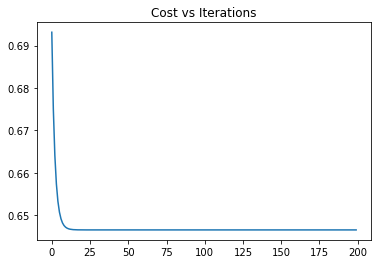

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.05 learning rate


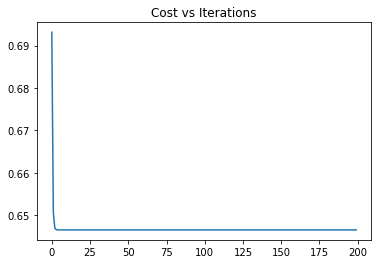

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.1 learning rate


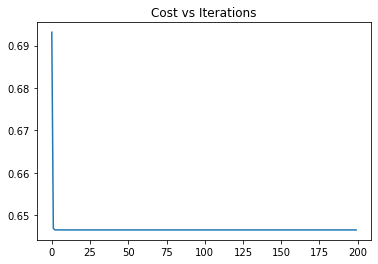

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 20000 number of iteration
For 0.5 learning rate


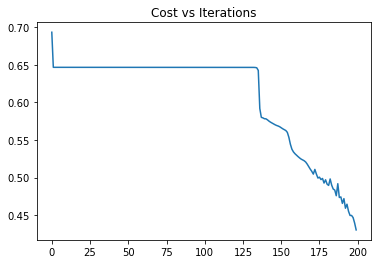

Accuracy of the model is 75.7328990228013
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.001 learning rate


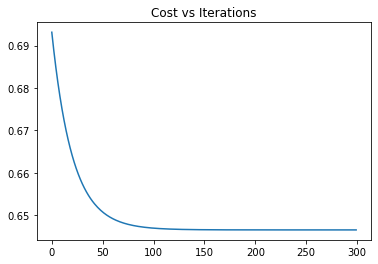

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.005 learning rate


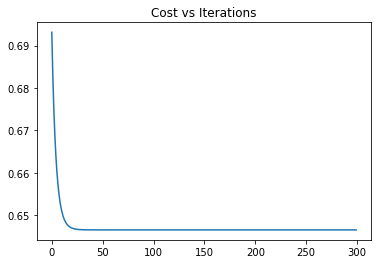

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.01 learning rate


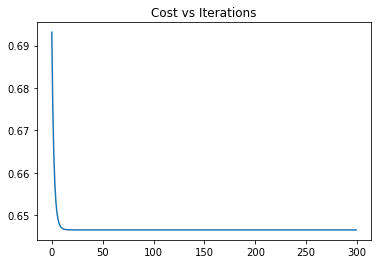

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.05 learning rate


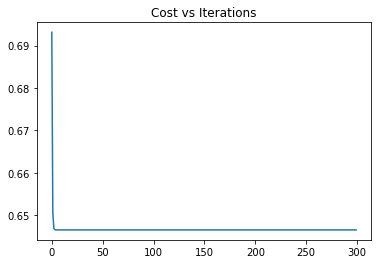

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.1 learning rate


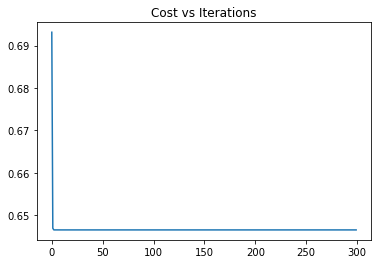

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 30000 number of iteration
For 0.5 learning rate


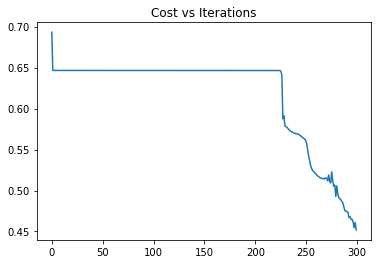

Accuracy of the model is 78.33876221498372
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.001 learning rate


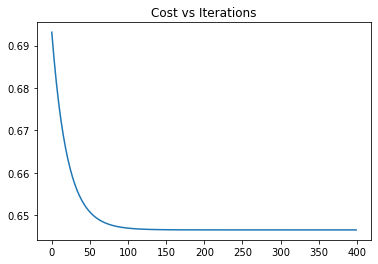

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.005 learning rate


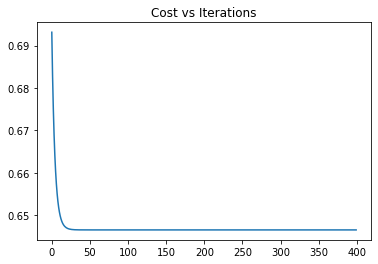

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.01 learning rate


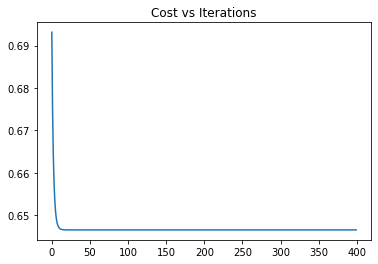

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.05 learning rate


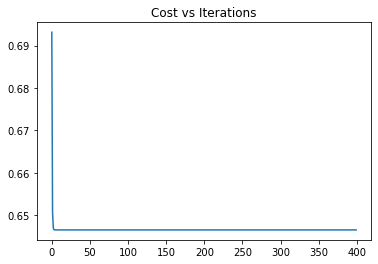

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.1 learning rate


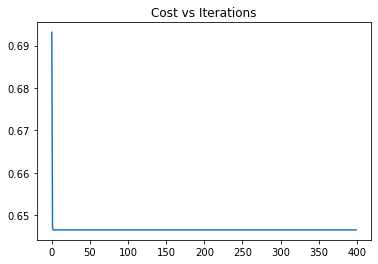

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 40000 number of iteration
For 0.5 learning rate


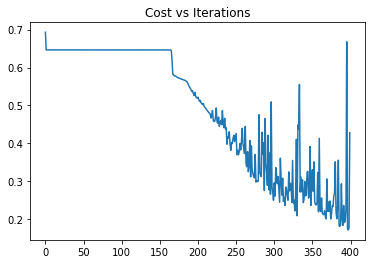

Accuracy of the model is 87.45928338762215
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.001 learning rate


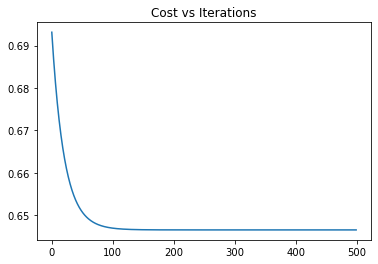

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.005 learning rate


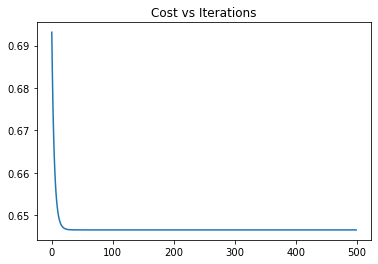

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.01 learning rate


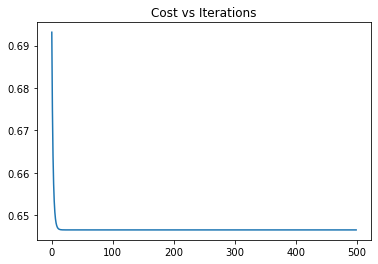

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.05 learning rate


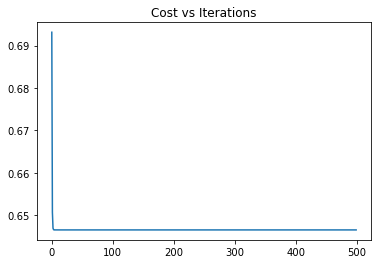

Accuracy of the model is 65.14657980456026
********************************************************************************************************************************************************************************************************
For 50000 number of iteration
For 0.1 learning rate


In [ ]:
## Hyper paramters tuning
for i in [10000, 20000, 30000, 40000, 50000]:
    for j in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
        print(f'For {i} number of iteration')
        print(f'For {j} learning rate')
        parameters_final, costs = L_layer_model(old_X_train, old_y_train, i, j)
#         predict(old_X_train, old_y_train, parameters_final)
        print("**"*100)